In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

## <a name="read"></a>Đọc dữ liệu
Ta sẽ đọc dữ liệu dưới dạng file CSV và đưa vào DataFrame của Pandas

In [ ]:
df = pd.read_csv("/Users/anhnhat/Documents/UEL/SepVI_1920/Phan tich du lieu Web/Final/VN_data.csv",lineterminator='\n')

We set some configuration options just for improving visualization graphs; nothing crucial

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Mô tả các dòng dữ liệu, ở đây chúng ta sẽ in ra 5 dòng đầu tiên của tập dữ liệu

In [ ]:
df.head()

video_id                                              title  \
0  WAxxfzdcNdA  em bỏ hút thuốc chưa - người yêu cũ nhắn tin h...   
1  8mItWIx3cs0  #3 Đàn ông dở nhất là phản bội, còn em không s...   
2  ayJY9ieBuEU  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3  GKTpUGkhvig           FAPtv Cơm Nguội: Tập 220 - Làng Nhảm Nhí   
4  qGjAWJ2zWWI                                   Agust D '대취타' MV   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-05-17T16:15:11Z  UC90LfbAFYhRLh86Qd-Fs4zg     BICH PHUONG          10   
1  2020-05-22T14:00:11Z  UC2Lgi2uPsOcCVF3imz7l2mg     Vie GIẢITRÍ          24   
2  2020-05-13T13:00:10Z  UCjm_FW7t1gam7qLldSVOclw       Hòa Minzy          10   
3  2020-05-23T12:58:15Z  UC0jDoh3tVXCaqJ6oTve8ebA          FAP TV           1   
4  2020-05-22T09:00:01Z  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   

  trending_date                                               tags  \
0      20.26.05  em bỏ hút thuốc chưa|anh bỏ hút thuốc chưa|em ...   
1      20.26.05  vie giai tri|giai tri tv|người ấy là ai|người ...   
2      20.26.05  hoa minzy|hòa minzy|hòa minzy 2020|không thể c...   
3      20.26.05  FAPTV|faptv|faptivi|FAPtivi|Faptv cơm nguộii|c...   
4      20.26.05  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|Agust D|어거스트 디...   

   view_count    likes  dislikes  comment_count  \
0    12541198   329323     10193          33498   
1     5148975    47047      3533           6017   
2    21413308   637643     20295          52810   
3     3681043    92551      3305           2970   
4    44924142  5752355     99816         743758   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/WAxxfzdcNdA/default.jpg              False   
1  https://i.ytimg.com/vi/8mItWIx3cs0/default.jpg              False   
2  https://i.ytimg.com/vi/ayJY9ieBuEU/default.jpg              False   
3  https://i.ytimg.com/vi/GKTpUGkhvig/default.jpg              False   
4  https://i.ytimg.com/vi/qGjAWJ2zWWI/default.jpg              False   

   ratings_disabled                                        description  \
0             False  Bích Phương - em bỏ hút thuốc chưa? (feat. tra...   
1             False  #NgườiẤyLàAi #NguoiAyLaAiMua3 #VieChannelHTV2 ...   
2             False  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3             False  FAPtv Cơm Nguội: Tập 220 - Làng Nhảm NhíSăn X-...   
4             False  Agust D '대취타' MV Agust D - 'D-2' DownloadGoogl...   

           filename  
0  data_VN/VN01.csv  
1  data_VN/VN01.csv  
2  data_VN/VN01.csv  
3  data_VN/VN01.csv  
4  data_VN/VN01.csv

Now, let's see some information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 17 columns):
video_id             1572 non-null object
title                1572 non-null object
publishedAt          1572 non-null object
channelId            1572 non-null object
channelTitle         1572 non-null object
categoryId           1572 non-null int64
trending_date        1572 non-null object
tags                 1572 non-null object
view_count           1572 non-null int64
likes                1572 non-null int64
dislikes             1572 non-null int64
comment_count        1572 non-null int64
thumbnail_link       1572 non-null object
comments_disabled    1572 non-null bool
ratings_disabled     1572 non-null bool
description          1571 non-null object
filename             1572 non-null object
dtypes: bool(2), int64(5), object(10)
memory usage: 187.4+ KB


We can see that there are `40,949` entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have `40,949` non-null entries) except `description` column which has some `null` values; it only has `40,379` non-null values.

## <a name="clean"></a>Làm sạch dữ liệu
The `description` column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by `NaN`

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

video_id                          title           publishedAt  \
117  JAgsJJnOZzQ  Yug mes nyuam them nqi part10  2020-05-25T00:52:03Z   

                    channelId           channelTitle  categoryId  \
117  UCzFOZ_ezFekHPy3RL4KmbyQ  Paj ncaim toj Channel          22   

    trending_date    tags  view_count  likes  dislikes  comment_count  \
117      20.26.05  [none]       93197   1740       170             62   

                                     thumbnail_link  comments_disabled  \
117  https://i.ytimg.com/vi/JAgsJJnOZzQ/default.jpg              False   

     ratings_disabled description          filename  
117             False         NaN  data_VN/VN01.csv

So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the `description` column

In [ ]:
df["description"] = df["description"].fillna(value="")

## <a name="coll"></a>Dataset collection years
Let's see in which years the dataset was collected

  date  No_of_videos
0   05           800
1   06           772


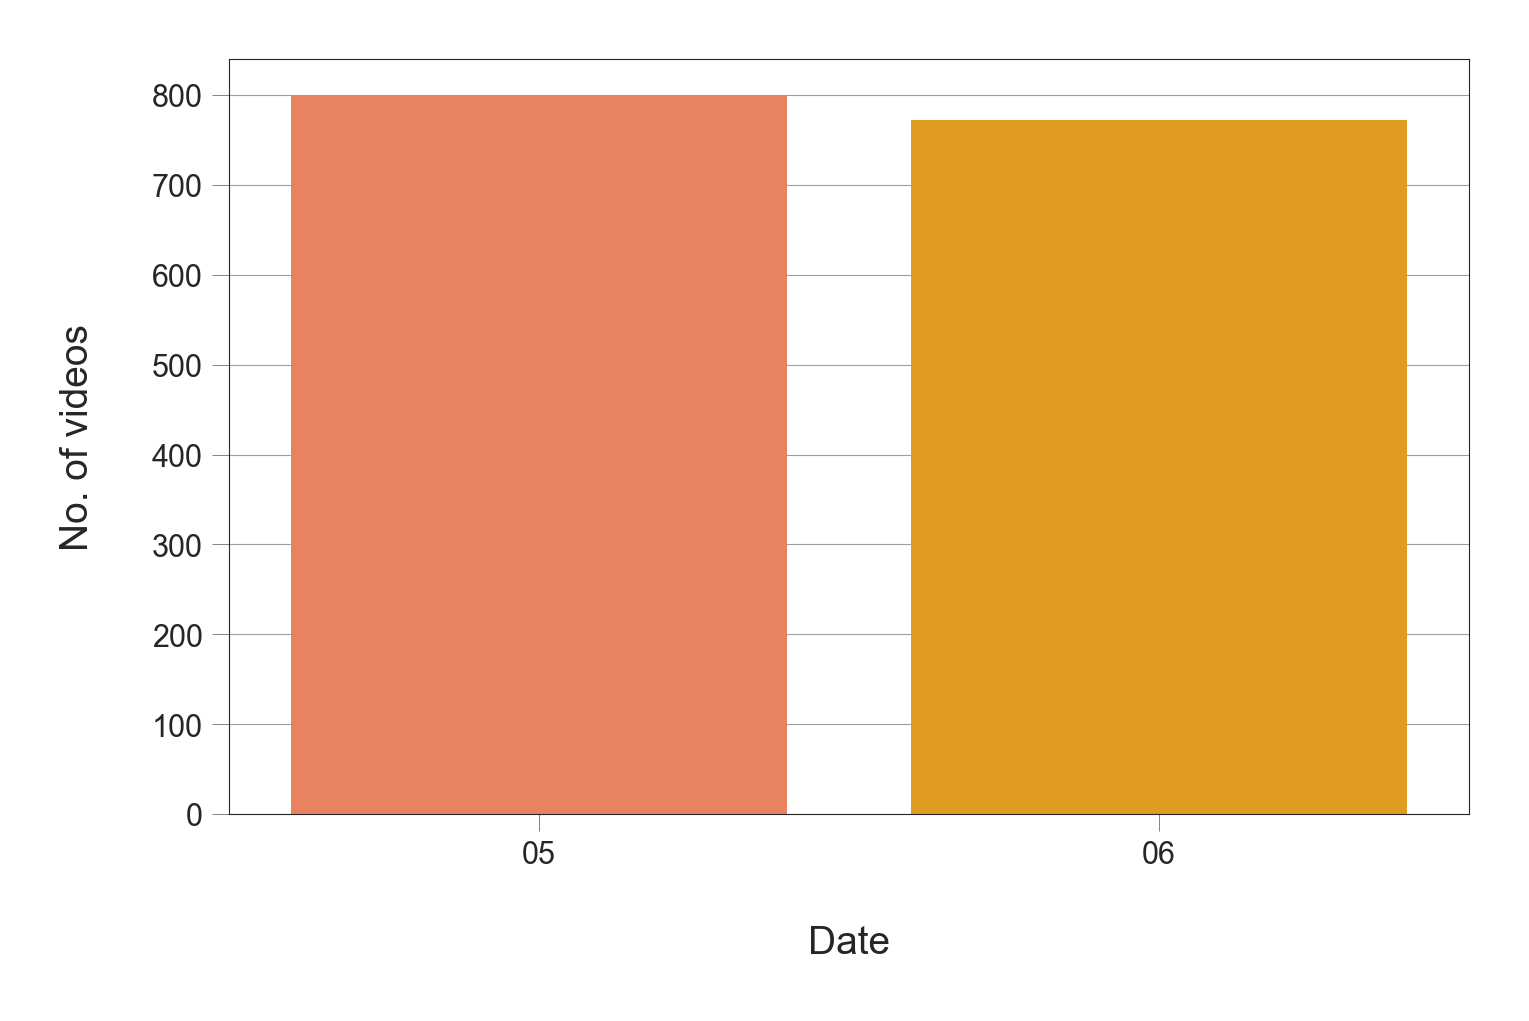

In [ ]:
cdf = df["trending_date"].apply(lambda x: x[6:]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "date", "trending_date": "No_of_videos"})
print(cdf)

fig, ax = plt.subplots()
_ = sns.barplot(x="date", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Date", ylabel="No. of videos")


    date  No_of_videos
0  29.05           200
1  31.05           200
2  30.05           200
3  07.06           200
4  26.05           200
5  01.06           200
6  05.06           125
7  02.06           124
8  03.06           123


Text(0.5, 1.0, 'Number of data collect per day')

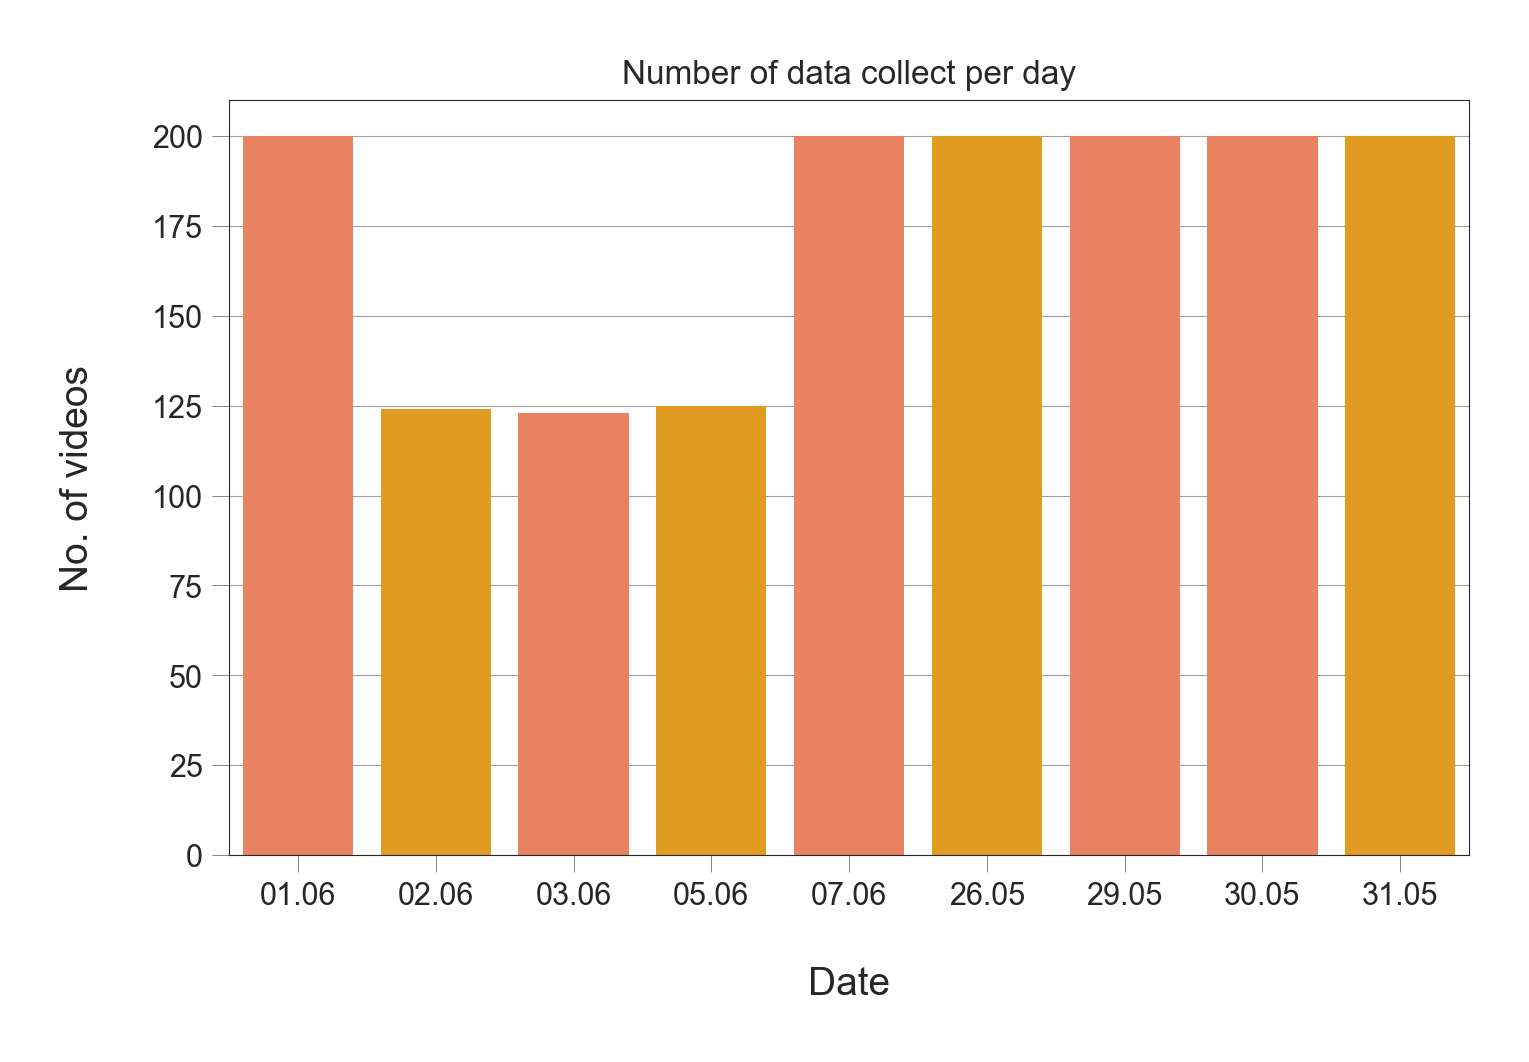

In [ ]:
cdf = df["trending_date"].apply(lambda x:  x[3:]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "date", "trending_date": "No_of_videos"})
print(cdf)
fig, ax = plt.subplots()
_ = sns.barplot(x="date", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Date", ylabel="No. of videos")
plt.title("Number of data collect per day")



## <a name="descn"></a>Biểu thị một số giá trị Thống kê
Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
df.describe()

categoryId  view_count      likes  dislikes  comment_count
count     1572.00     1572.00    1572.00   1572.00        1572.00
mean        15.41  4229646.61  164127.98   5170.64       16430.74
std          8.73  9973229.21  669695.63  19109.05       80280.03
min          1.00    39129.00       0.00      0.00           0.00
25%         10.00   586796.00    3760.50    347.75         232.25
50%         17.00  1394699.50   13474.00    926.50         798.00
75%         24.00  3205167.75   50753.50   2120.25        3445.75
max         28.00 89178790.00 6553197.00 189535.00      872476.00

Dựa vào bảng trên, chúng ta rút ra được một số kết luận như sau:
- Số lượt views trung bình của Video Treding là `4,229,646.61`. Trung vị của lượt Víews là `1,394,699.50`, điều đó có nghĩa là một nửa số video trong tập dữ liệu có lượt Views lớn hơn số này, và nửa còn lại sẽ bé hơn số này
- Số lượt likes trung bình của mỗi video là `164,127.98`, trong khi đó trung bình của lượt dislikes là `5170.64`.  
- Mỗi video ở Youtube Treding Việt Nam trung bình có khoảng `16,430` lượt comments  trong khi đó trung vị là `798`
- Ta cũng có thể thấy, Video có lượt views lớn nhất là `89,178,790.00`, video có lượt views nhỏ nhất là `39,129.00`, bảng dưới đây cho ta thấy điều đó

In [ ]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channelTitle', 'thumbnail_link', 'publishedAt', 'view_count']
maxVid=df[df['view_count']==df['view_count'].max()]
minVid=df[df['view_count']==df['view_count'].min()]
getMarginVid=maxVid.append(minVid, ignore_index=True)
# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in getMarginVid.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[12]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[1])  + '</td>'
    HTML_row += '<td>' + str(row[8]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Víews</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)



### <a name="vh"></a>Views histogram
Sau khi phân tích tập dữ liệu, tuy sự phân bố của lượt Views là rất lớn trải dài từ hơn 30 nghìn đến hơn 80 triệu Views, tuy nhiên nhóm nhận thấy lượt Views trong nhóm từ 0-10 triệu Views chiếm đa số, gần như đa số lượt video của tập dữ liệu

Text(0.5, 1.0, 'Total Videos and Views < 10M Views')

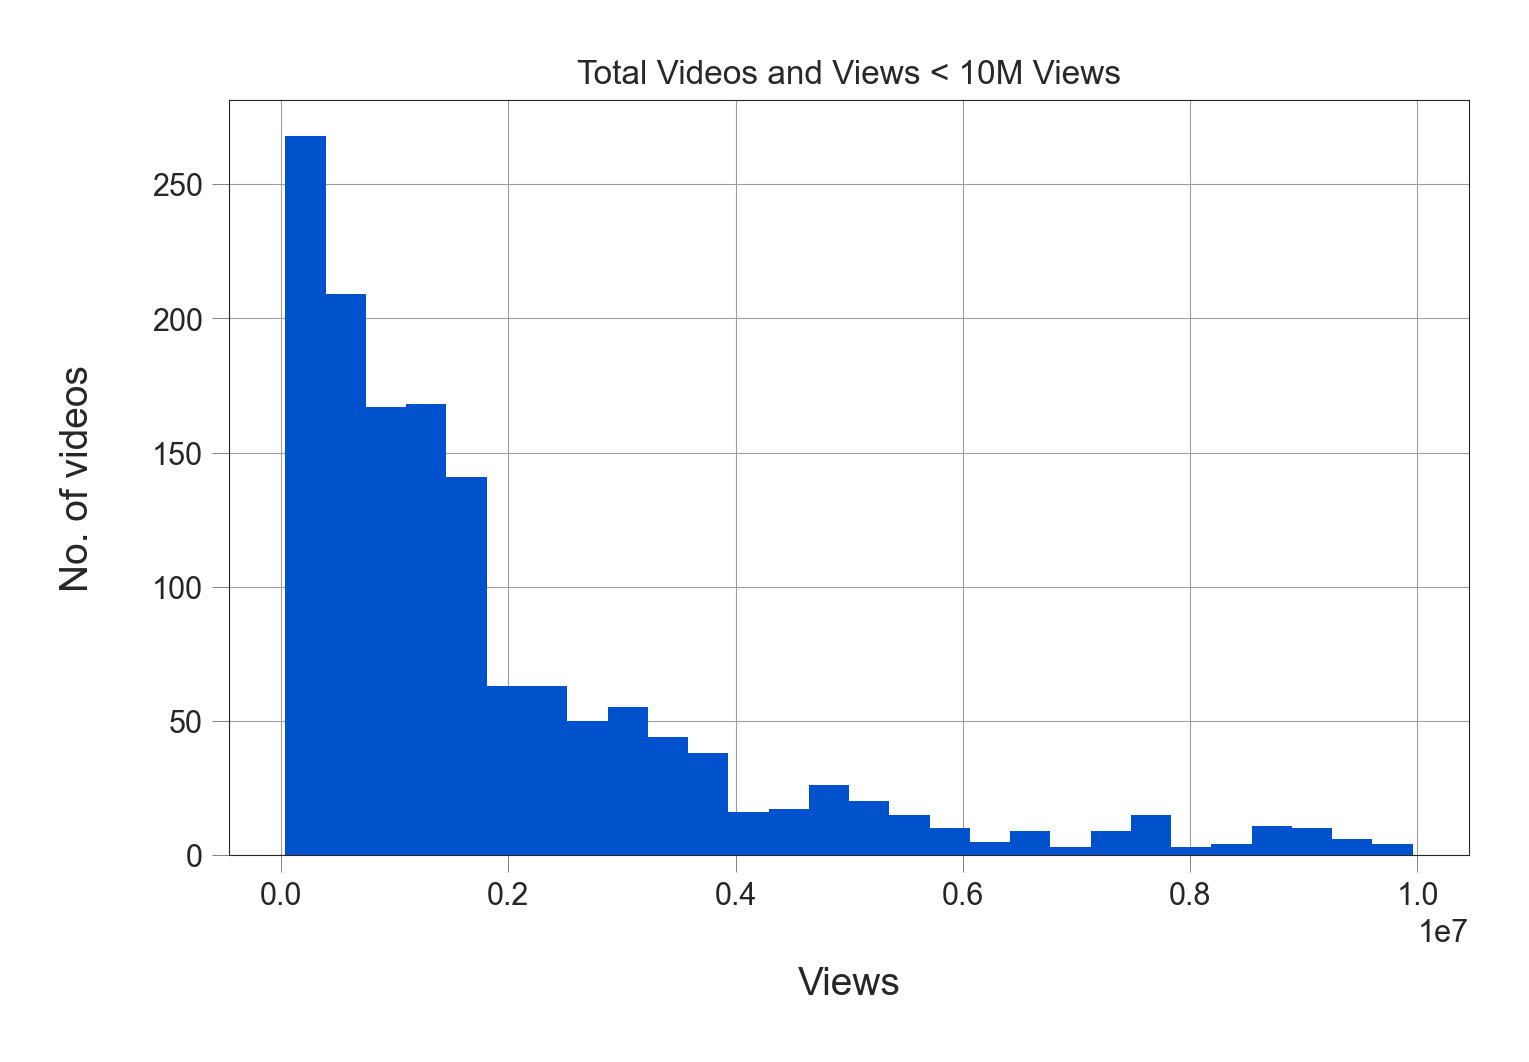

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 10e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[1], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")
plt.title("Total Videos and Views < 10M Views")

Now we see that the majority of trending videos have `1` million views or less. Let's see the exact percentage of videos less than `1` million views

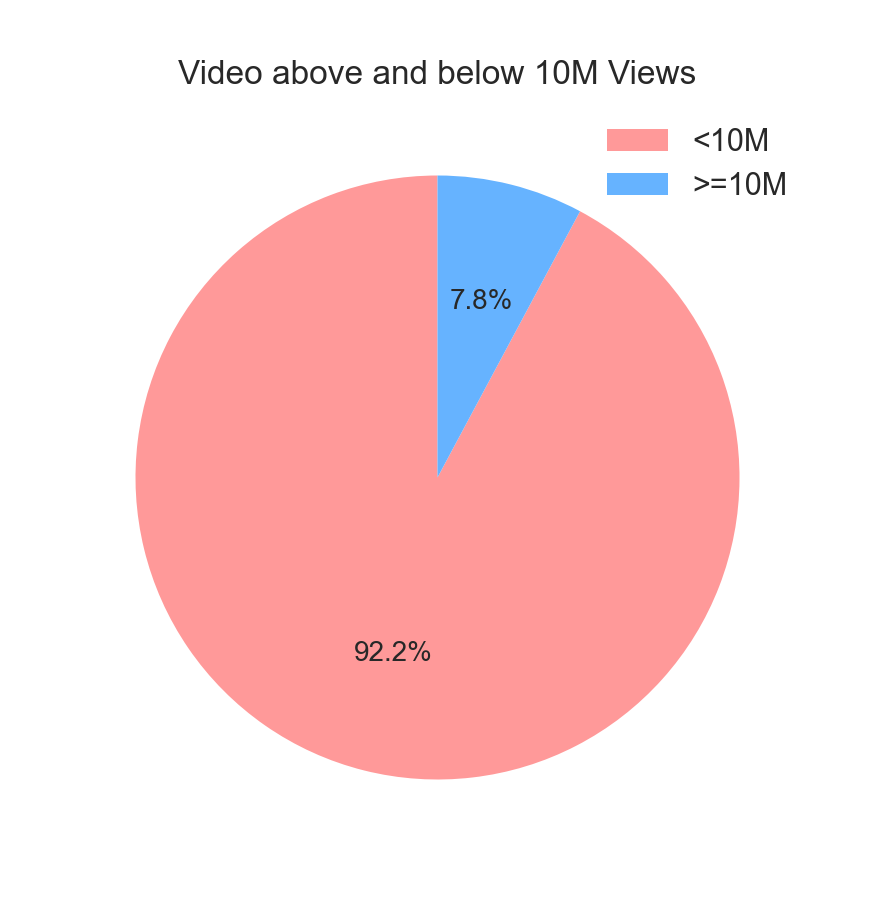

In [ ]:
max_views=df[df['view_count'] < 10e6]['view_count'].count() / df['view_count'].count() * 100
min_views=df[df['view_count'] >= 10e6]['view_count'].count() / df['view_count'].count() * 100
df_views=df2 = pd.DataFrame([[max_views,min_views]], columns=['max_views','min_views'])

plt.pie(df_views,autopct='%0.1f%%',startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Video above and below 10M Views")
plt.legend(["<10M",">=10M"])

Từ phân tích có thể thấy, gần `92.2%` videos dưới 10 triệu Views, chỉ có khoảng `7.8%` videos có trên 10 triệu Views
### <a name="lh"></a>Likes histogram 

Sau`views`, chúng ta sẽ phân tích histogram cho cột `likes` 

Chúng ta cùng nhìn qua sự phân bổ của lượt likes của các videos nằm trong khoảng từ `0` đến `100,000` likes

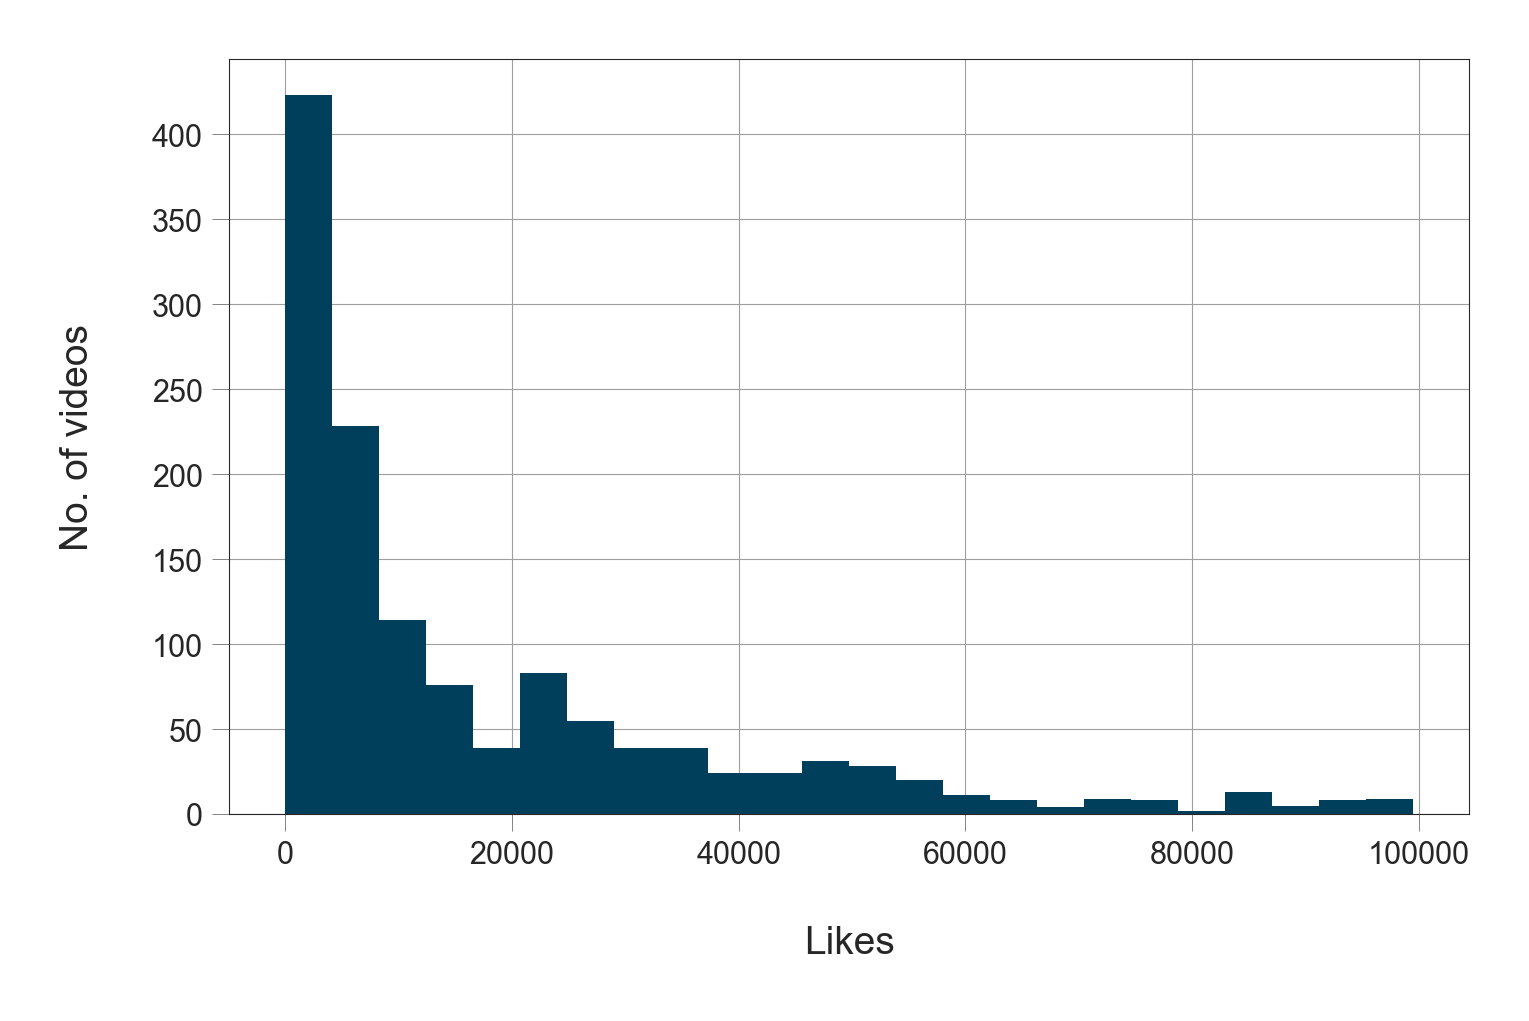

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Từ biểu đồ trên, ta có thể thấy được từ `60,000` likes thì tập dữ liệu bắt đầu có sự phân hóa thành hai miền, nửa bên phải chiếm rất nhiều videos có lượt likes nhỏ hơn `60,000`, bên phía còn lại thì chiếm ít hơn, ta có thể dự đoán tỉ lệ của lượt likes cũng tuân theo quy tắc 80/20, để chứng minh cho dự đoán đó ta sẽ cùng nhìn biểu đồ dưới đây.

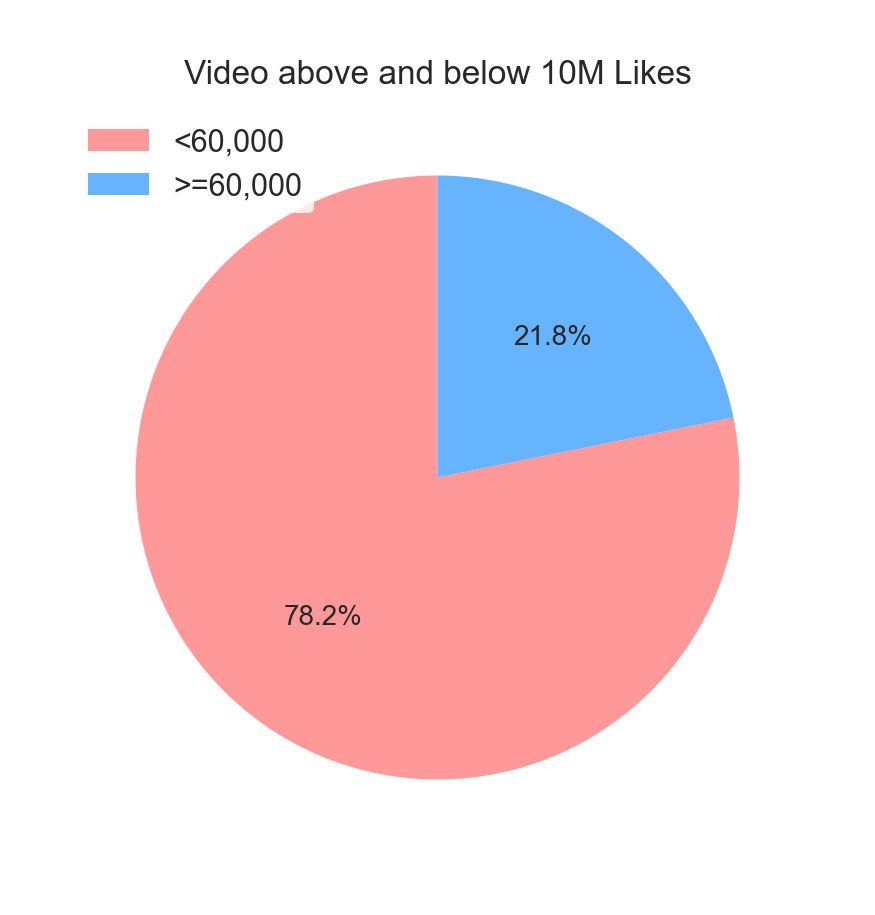

In [ ]:

max_likes=df[df['likes'] < 6e4]['likes'].count() / df['likes'].count() * 100
min_likes=df[df['likes'] >= 6e4]['comment_count'].count() / df['likes'].count() * 100
df_likes = pd.DataFrame([[max_likes,min_likes]], columns=['max_likes','min_likes'])

plt.pie(df_likes,autopct='%0.1f%%',startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Video above and below 10M Likes")
plt.legend(["<60,000",">=60,000"])

Đúng như ta dự đoán, có tới `78,2%` videos có dưới `60,000` likes, và `21,8%` videos có trên `60,000` likes

### <a name="ch"></a>Comment count histogram

Let's get a closer look by eliminating entries with comment count larger than `200000` comment

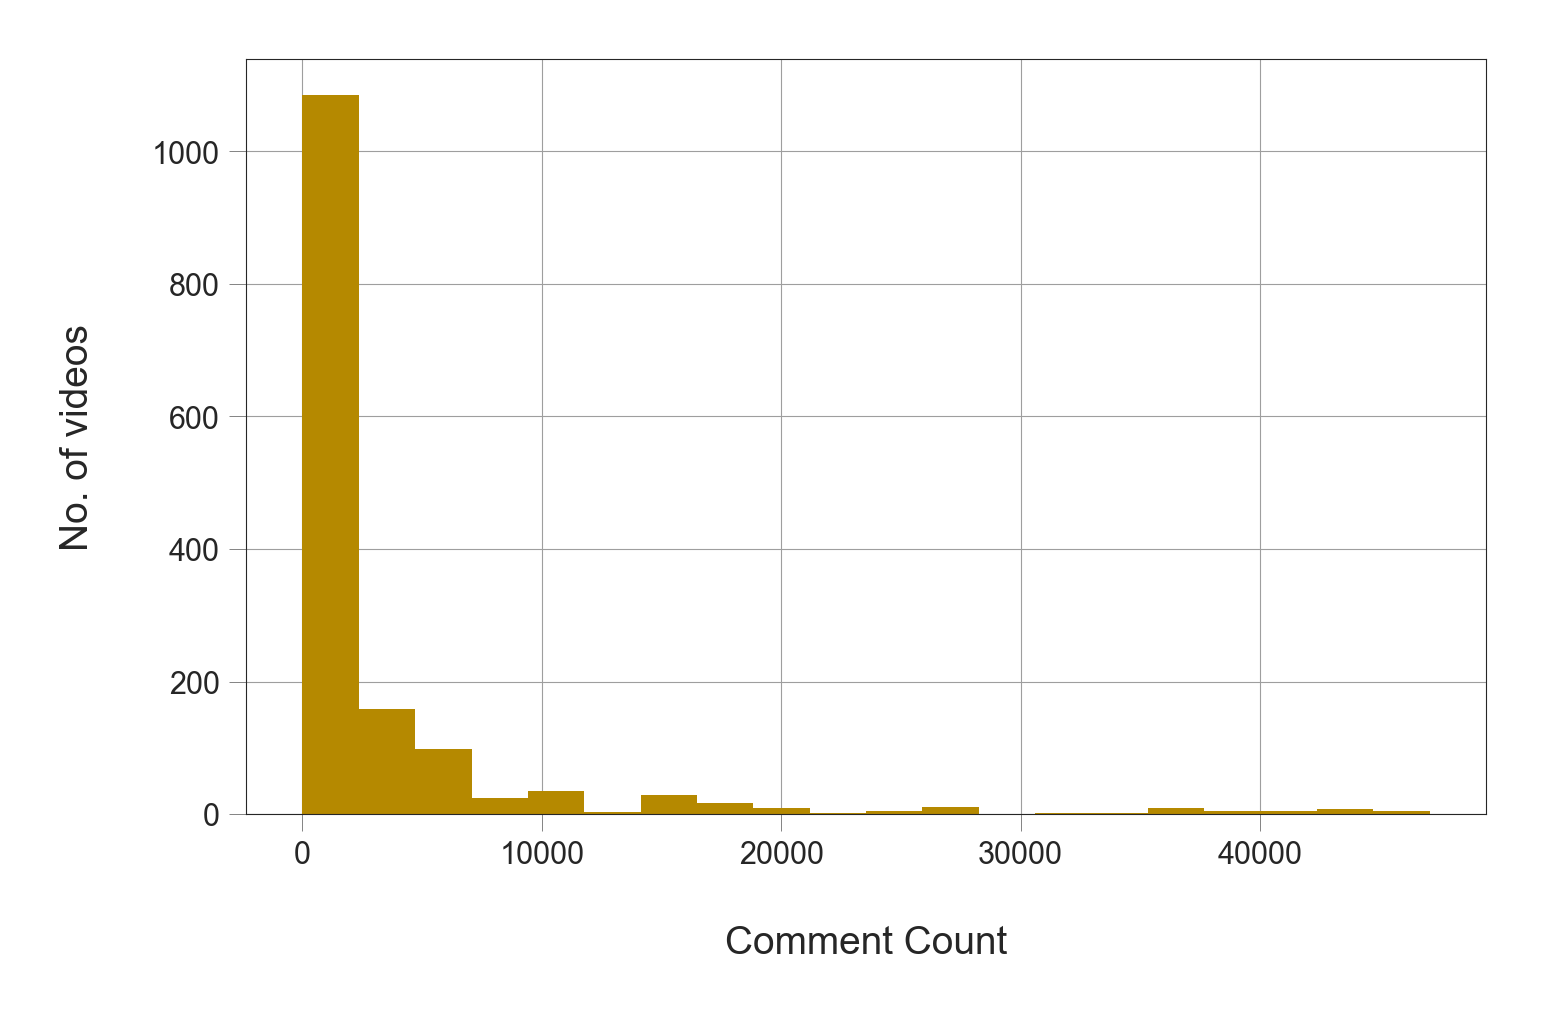

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 50000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[3], hist_kws={'alpha': 1}, 
                 bins=20, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins. 

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

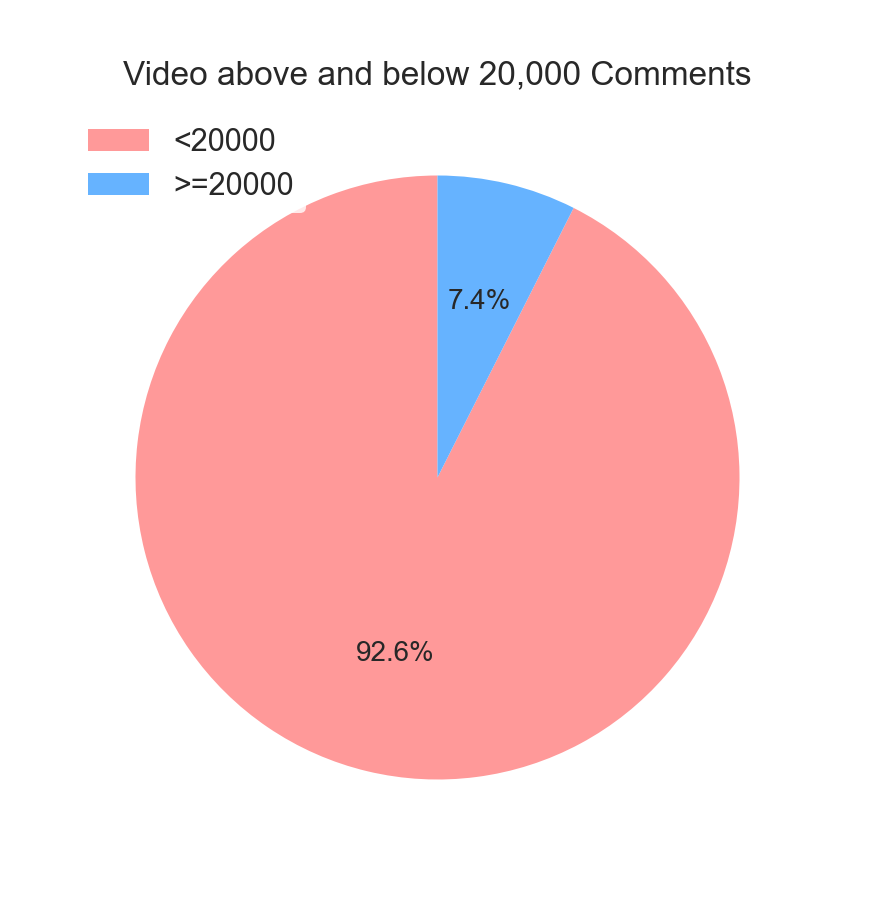

In [ ]:
max_likes=df[df['comment_count'] < 20000]['comment_count'].count() / df['comment_count'].count() * 100
min_likes=df[df['comment_count'] >= 20000]['comment_count'].count() / df['comment_count'].count() * 100
df_likes = pd.DataFrame([[max_likes,min_likes]], columns=['max_likes','min_likes'])

plt.pie(df_likes,autopct='%0.1f%%',startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Video above and below 20,000 Comments")
plt.legend(["<20000",">=20000"])

Tương tự ở trên

## <a name="descnn"></a>Tìm hiểu về các cột không phải dạng số
Sau khi tìm hiểu các cột dữ liệu dạng số, ta sẽ tìm hiểu các phần không phải là số

In [ ]:
df.describe(include = ['O'])

video_id                                              title  \
count          1572                                               1572   
unique          430                                                436   
top     c896HneZZF0  ERIK - 'Em Không Sai, Chúng Ta Sai' (Official MV)   
freq              9                                                  9   

                 publishedAt                 channelId  channelTitle  \
count                   1572                      1572          1572   
unique                   424                       285           285   
top     2020-05-06T12:00:13Z  UCH-_NjZ3ojREOwBZt-3pYLA  WeTV Vietnam   
freq                      17                        27            27   

       trending_date    tags                                  thumbnail_link  \
count           1572    1572                                            1572   
unique             9     419                                             430   
top         20.01.06  [none]  https://i.ytimg.com/vi/Zsx-4qsOEks/default.jpg   
freq             200      30                                               9   

                                              description          filename  
count                                                1572              1572  
unique                                                443                 9  
top     ►Bạn muốn xem trọn bộ, hãy tải ngay ứng dụng W...  data_VN/VN05.csv  
freq                                                   27               200

Từ bảng trên, ta có thể thấy có `9` giá trị `trending_date` duy nhất, điều đó có nghĩa là tập dữ liệu này được thu thập từ **`9`** days.

Từ cột `video_id`, ta có thể thấy tập dữ liệu có `1572` videos , nhưng ở đây chỉ có `430` videos duy nhất - điều đó có nghĩa là có rất nhiều videos xuất hiện nhiều lần trên bảng xếp hạng trending trong suốt nhiều ngày.

Ta có thể thấy ca khúc `Em Không Sai, Chúng Ta Sai` của ca sĩ `Erik` xuất hiện liên tục trong suốt 9 ngày, đây là video có tần xuất xuất hiện lớn nhất.

Bên cạnh đó có một điều rất lạ trong tập dữ liệu: Chúng ta có `430` video IDs duy nhất, theo logic thì sẽ có `430`  video 430 duy nhất. Tuy nhiên ta có thể thấy có tận `436` `title`, chứng tỏ có `6` videos đã được đổi tên trong suốt quá trình chúng trở thành trending videos.

Ta sẽ cùng nhìn vào một video `title` để hiểu được ví dụ về một video đã đổi tên trong quá trình đăng trên Youtube.

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]
example_title_df= pd.DataFrame(wanted_groups[0])
example_title_df.to_csv('example_title_df.csv', index=False)

In [ ]:
#Triệu ơi m vào drive lấy quả hình example_gui_trieu để lấy quả hình chèn vào nhé

In [ ]:
df.head()

video_id                                              title  \
0  WAxxfzdcNdA  em bỏ hút thuốc chưa - người yêu cũ nhắn tin h...   
1  8mItWIx3cs0  #3 Đàn ông dở nhất là phản bội, còn em không s...   
2  ayJY9ieBuEU  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3  GKTpUGkhvig           FAPtv Cơm Nguội: Tập 220 - Làng Nhảm Nhí   
4  qGjAWJ2zWWI                                   Agust D '대취타' MV   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-05-17T16:15:11Z  UC90LfbAFYhRLh86Qd-Fs4zg     BICH PHUONG          10   
1  2020-05-22T14:00:11Z  UC2Lgi2uPsOcCVF3imz7l2mg     Vie GIẢITRÍ          24   
2  2020-05-13T13:00:10Z  UCjm_FW7t1gam7qLldSVOclw       Hòa Minzy          10   
3  2020-05-23T12:58:15Z  UC0jDoh3tVXCaqJ6oTve8ebA          FAP TV           1   
4  2020-05-22T09:00:01Z  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   

  trending_date                                               tags  \
0      20.26.05  em bỏ hút thuốc chưa|anh bỏ hút thuốc chưa|em ...   
1      20.26.05  vie giai tri|giai tri tv|người ấy là ai|người ...   
2      20.26.05  hoa minzy|hòa minzy|hòa minzy 2020|không thể c...   
3      20.26.05  FAPTV|faptv|faptivi|FAPtivi|Faptv cơm nguộii|c...   
4      20.26.05  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|Agust D|어거스트 디...   

   view_count    likes  dislikes  comment_count  \
0    12541198   329323     10193          33498   
1     5148975    47047      3533           6017   
2    21413308   637643     20295          52810   
3     3681043    92551      3305           2970   
4    44924142  5752355     99816         743758   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/WAxxfzdcNdA/default.jpg              False   
1  https://i.ytimg.com/vi/8mItWIx3cs0/default.jpg              False   
2  https://i.ytimg.com/vi/ayJY9ieBuEU/default.jpg              False   
3  https://i.ytimg.com/vi/GKTpUGkhvig/default.jpg              False   
4  https://i.ytimg.com/vi/qGjAWJ2zWWI/default.jpg              False   

   ratings_disabled                                        description  \
0             False  Bích Phương - em bỏ hút thuốc chưa? (feat. tra...   
1             False  #NgườiẤyLàAi #NguoiAyLaAiMua3 #VieChannelHTV2 ...   
2             False  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3             False  FAPtv Cơm Nguội: Tập 220 - Làng Nhảm NhíSăn X-...   
4             False  Agust D '대취타' MV Agust D - 'D-2' DownloadGoogl...   

           filename  
0  data_VN/VN01.csv  
1  data_VN/VN01.csv  
2  data_VN/VN01.csv  
3  data_VN/VN01.csv  
4  data_VN/VN01.csv

## <a name="cap"></a>Bao nhiêu video không chữ viết hoa trong tên?
Từ quan sát, nhóm thấy gần đây nổi lên videos đặt tên hoàn toàn bằng chữ thường (Ví dụ: `em bỏ hút thuốc chưa - người yêu cũ nhắn tin hỏi nhưng bích phương không muốn trả lời` của ca sĩ `Bích Phương`)
Triệu thêm ảnh `bich_phuong_gu_trieu' vào slides nhé

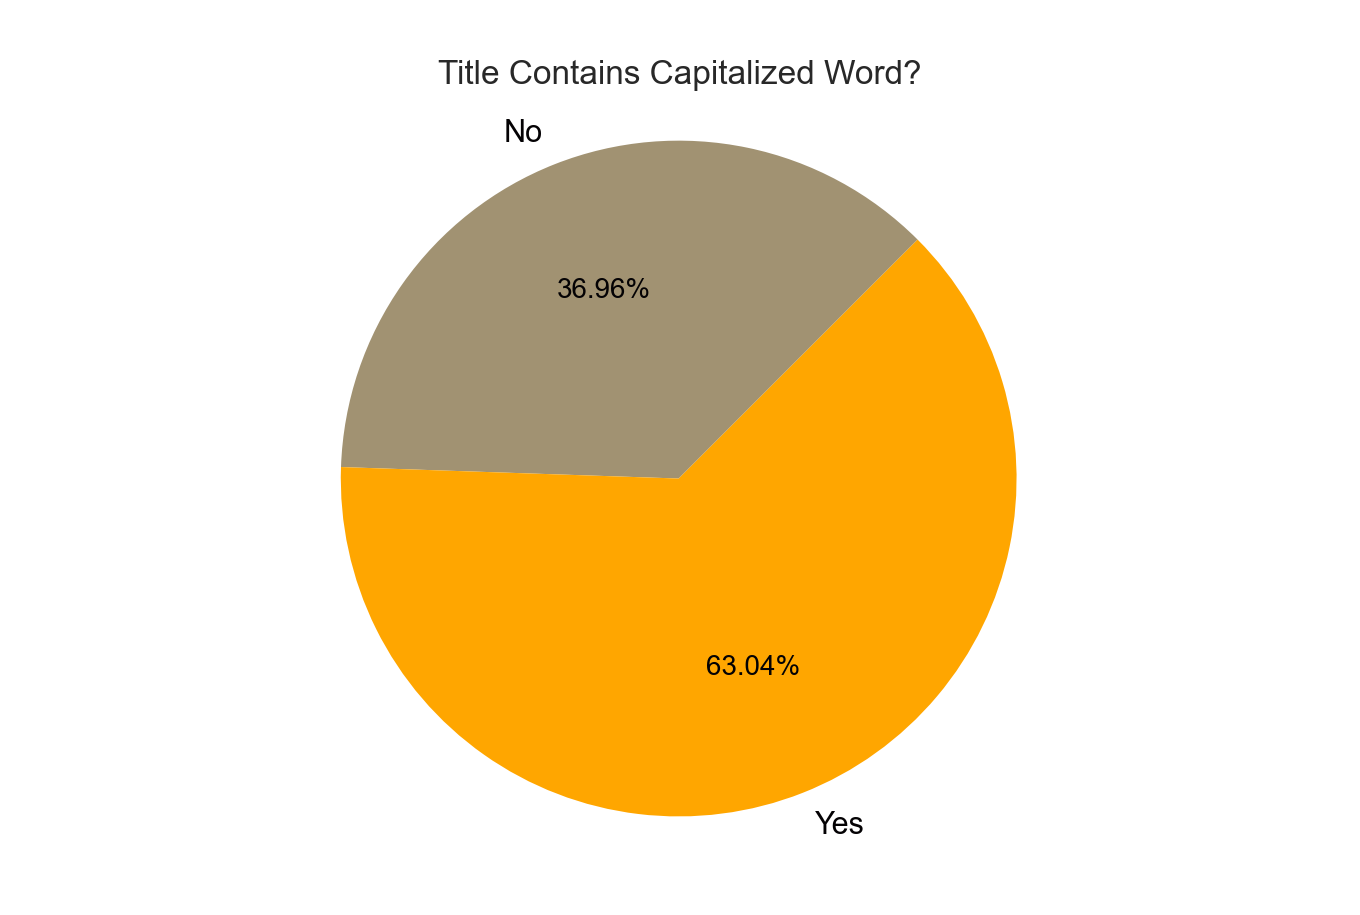

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#A19272', '#ffa600'], textprops={'color': '#040204'}, startangle=45,autopct="%0.2f%%")
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

True    0.63
False   0.37
Name: contains_capitalized, dtype: float64

Một điều bất ngờ là có tới `36,96%` videos không có bất cứ một chữ viết hoa nào trong tên

## <a name="len"></a>Độ dài video title


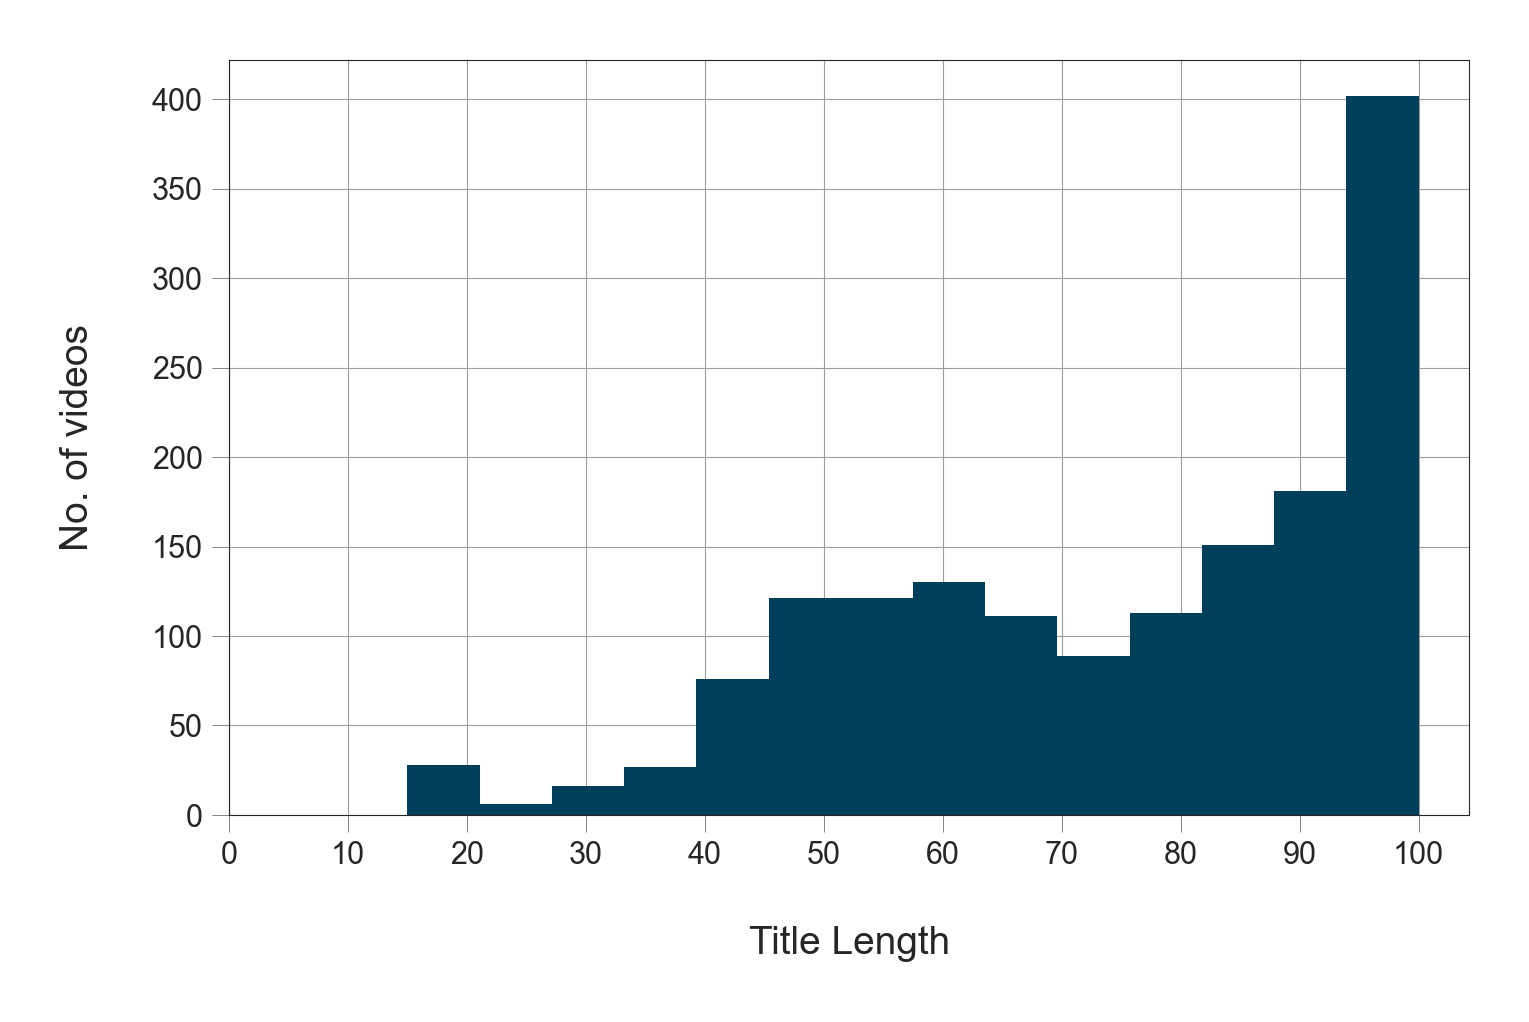

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

Ta có thể thấy mối quan hệ giữa độ dài tiêu đề video và số lượng videos, có thể thấy đa số các videos ở Youtube Treding Việt Nam có tiêu đề khá dài, dao động mạnh từ 40-100 từ
Tuy nhiên, để kiểm chứng xem có thực sự là videos càng nhiều chữ sẽ có lượt views càng lớn hay không thì ta sẽ vẽ scatter plot

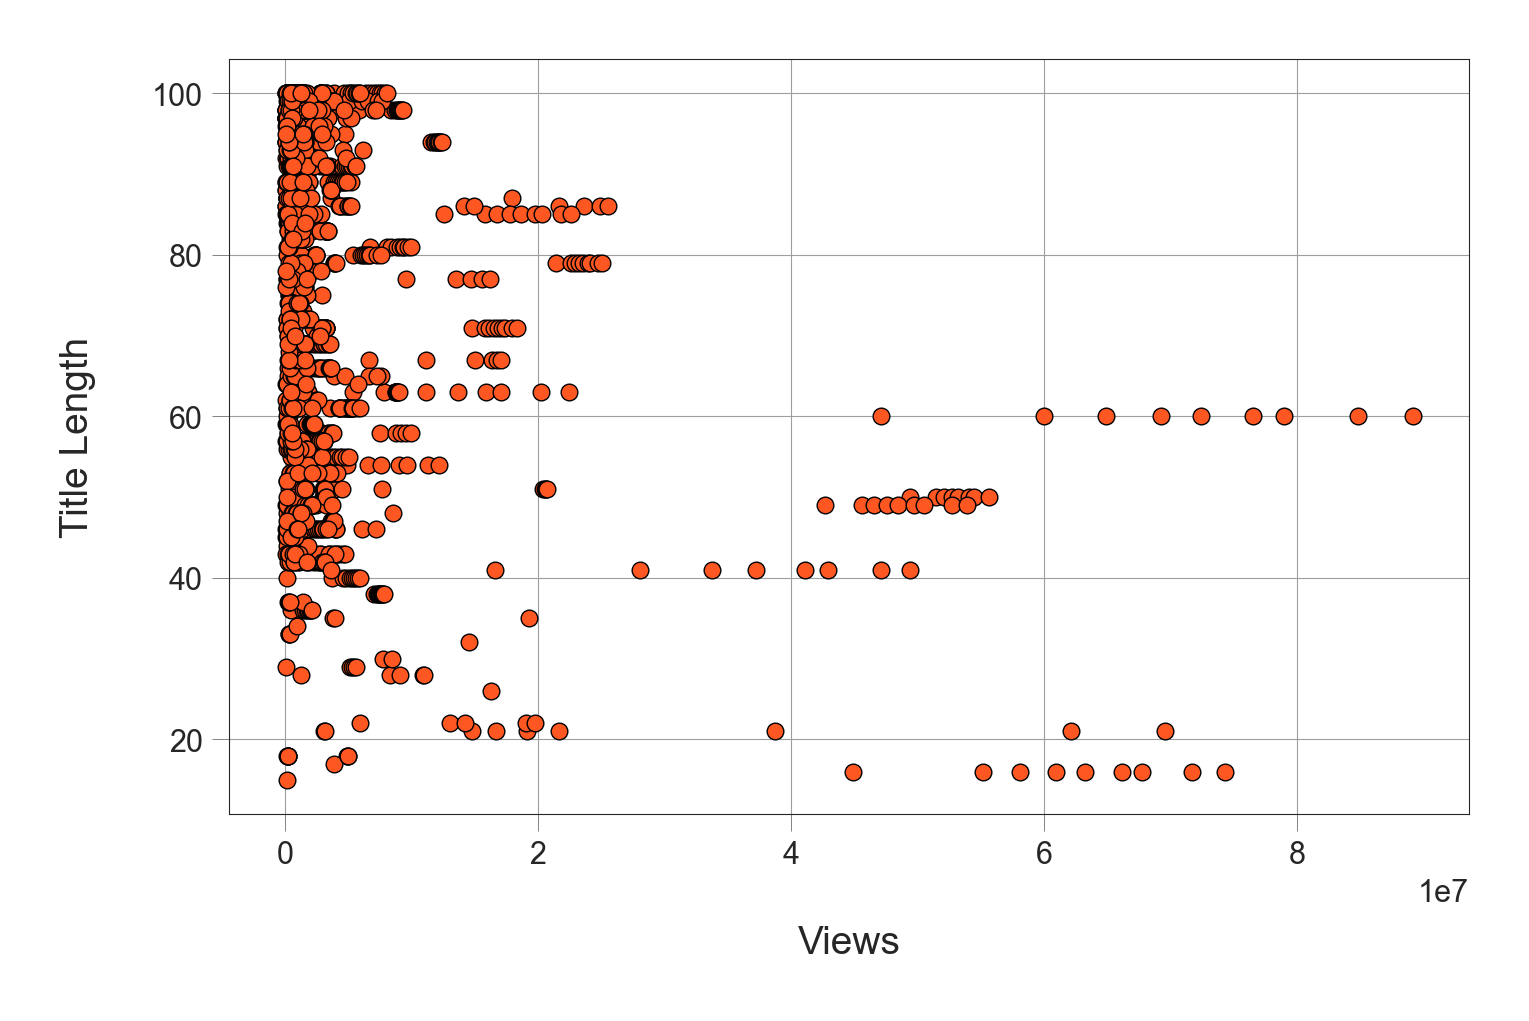

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Ta có thể thấy là không có mối quan hệ mật thiết nào giữa độ dài của tiêu đề video và lượt views của chúng, tuy nhiên những video có lượt views trên `5 triệu` thường có độ dài nằm trong khoảng `15-20` hoặc `60` chữ

## <a name="corr"></a>Sự tương quan (correlation) giữa các biến của dataset
Bây giờ, hãy xem các biến số liệu tương quan với nhau như thế nào: ví dụ như nhóm muốn xem lượt xem và lượt thích tương quan như thế nào, có nghĩa là lượt xem và thích tăng giảm cùng nhau (tương quan tích cực)? Có một trong giá trị  tăng khi giá trị kia giảm và ngược lại (tương quan tiêu cực)? Hay chúng không tương quan?

Tương quan được biểu diễn dưới dạng một giá trị giữa `-1` và` + 1` trong đó` + 1` biểu thị mối tương quan dương cao nhất, `-1` biểu thị mối tương quan âm cao nhất và` 0` biểu thị rằng không có mối tương quan.

Chúng ta hãy xem bảng tương quan giữa các biến số liệu của nhóm (chỉ các biến số và boolean)

In [ ]:
df.corr()

categoryId  view_count  likes  dislikes  comment_count  \
categoryId                  1.00       -0.08  -0.07     -0.08          -0.08   
view_count                 -0.08        1.00   0.85      0.90           0.75   
likes                      -0.07        0.85   1.00      0.88           0.95   
dislikes                   -0.08        0.90   0.88      1.00           0.80   
comment_count              -0.08        0.75   0.95      0.80           1.00   
comments_disabled           0.09        0.01  -0.02      0.00          -0.02   
ratings_disabled            0.09       -0.03  -0.03     -0.03          -0.01   
contains_capitalized       -0.01        0.06   0.08      0.03           0.10   
title_length                0.10       -0.29  -0.33     -0.28          -0.34   

                      comments_disabled  ratings_disabled  \
categoryId                         0.09              0.09   
view_count                         0.01             -0.03   
likes                             -0.02             -0.03   
dislikes                           0.00             -0.03   
comment_count                     -0.02             -0.01   
comments_disabled                  1.00             -0.01   
ratings_disabled                  -0.01              1.00   
contains_capitalized               0.04             -0.03   
title_length                      -0.01             -0.06   

                      contains_capitalized  title_length  
categoryId                           -0.01          0.10  
view_count                            0.06         -0.29  
likes                                 0.08         -0.33  
dislikes                              0.03         -0.28  
comment_count                         0.10         -0.34  
comments_disabled                     0.04         -0.01  
ratings_disabled                     -0.03         -0.06  
contains_capitalized                  1.00         -0.06  
title_length                         -0.06          1.00

Ví dụ, chúng tôi thấy rằng lượt xem và lượt thích có mối tương quan tích cực với giá trị tương quan là `0,85`; nhóm cũng thấy một mối tương quan tích cực cao (`0,95`) giữa số lượt thích và số bình luận, và giữa số lượt không thích và số bình luận (` 0,8`).

Videos có nhiều likes thì cũng sẽ có mối tương quan thuận với dislikes

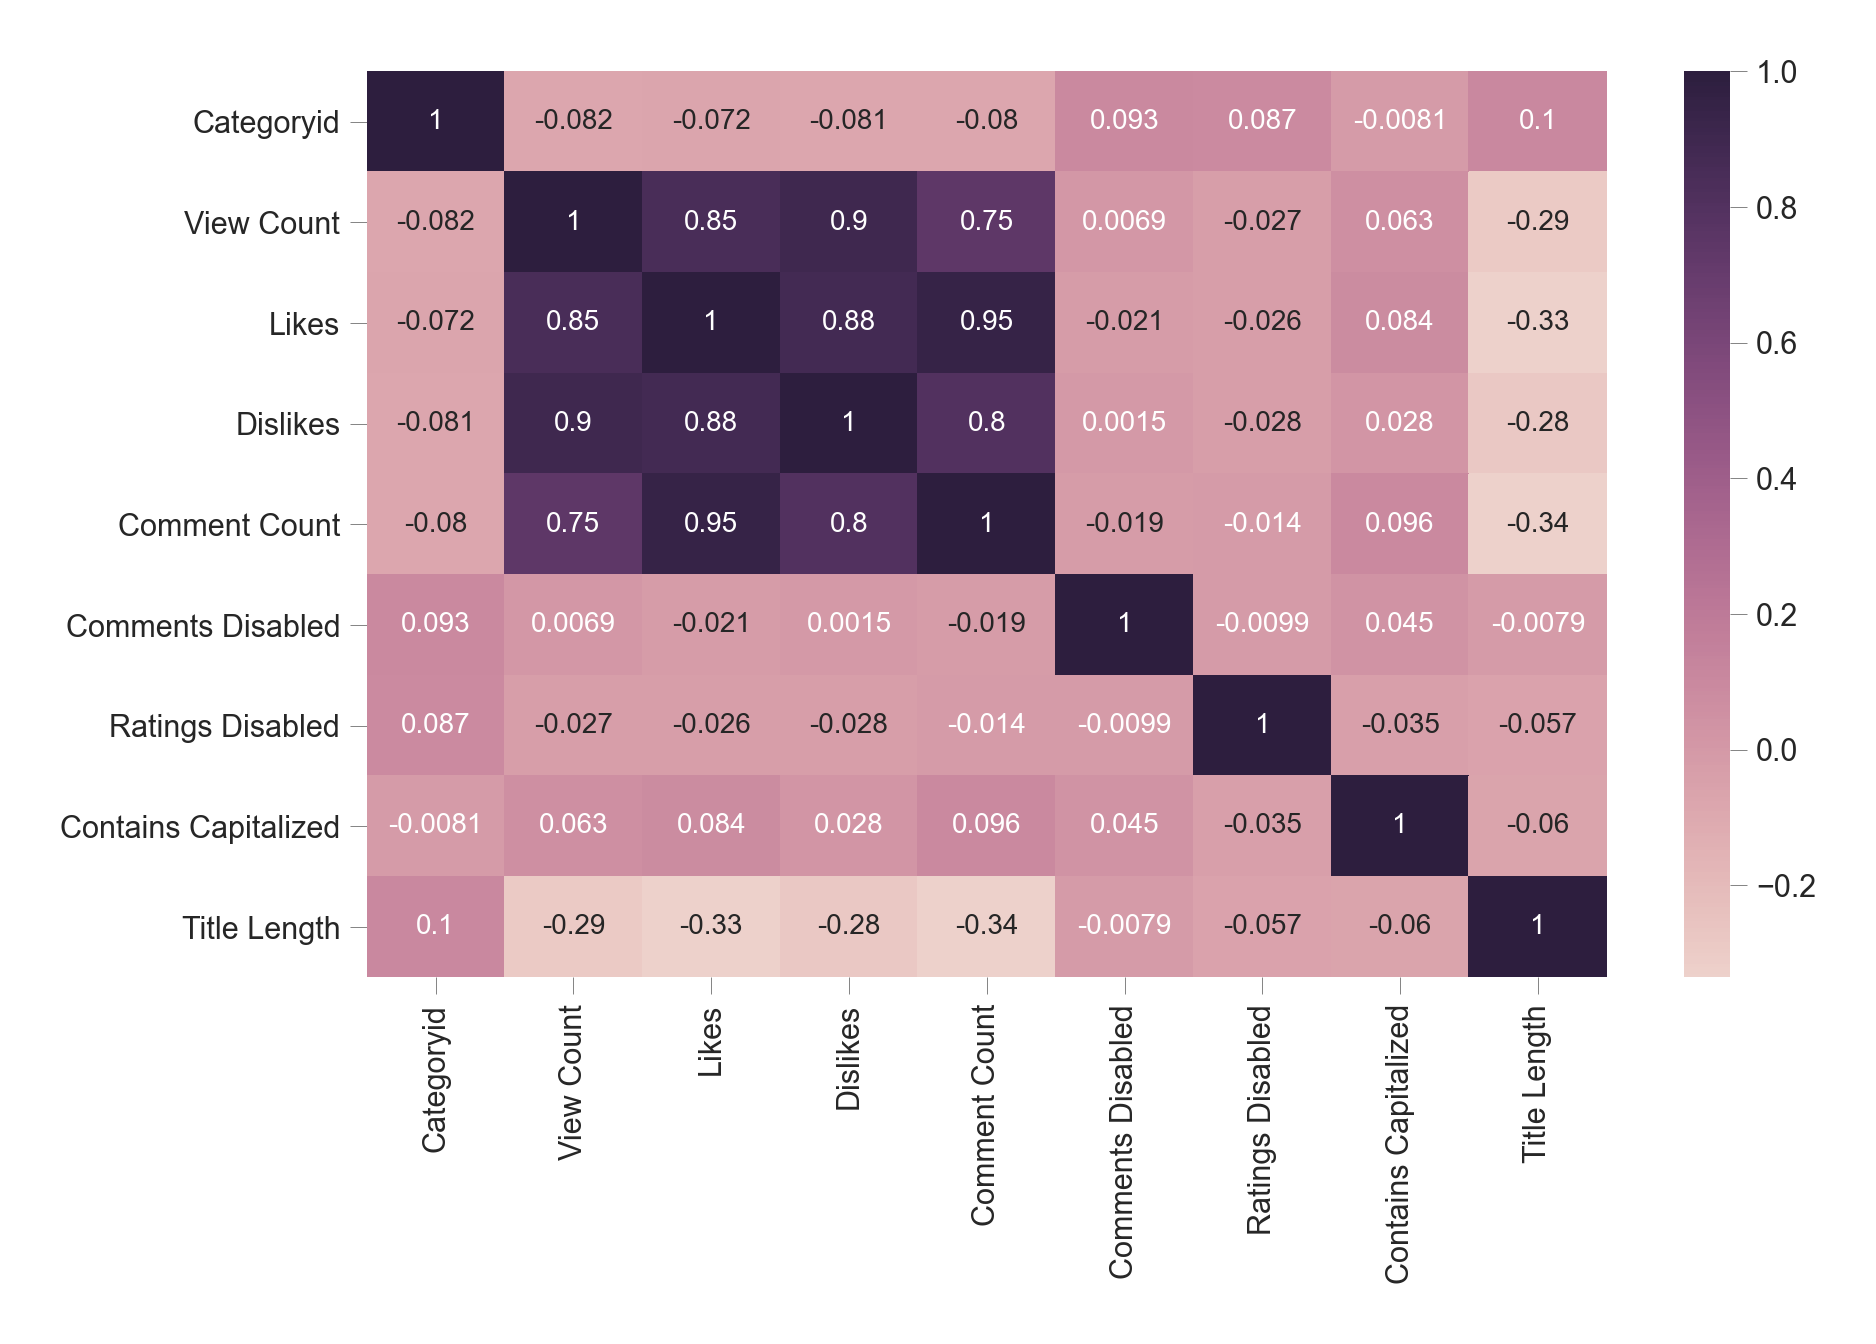

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

## <a name="commti"></a>Word Cloud cho Title và Tag

In [ ]:
with open('vietnamese-stopwords.txt') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] 

title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 1247),
 ('-', 857),
 ('Phim', 196),
 ('2020', 172),
 ('Tập', 162),
 ('Anh', 134),
 ('Nhất', 120),
 ('Hay', 118),
 ('Nhạc', 112),
 ('Không', 110),
 ('x', 105),
 ('Giang', 94),
 ('Em', 94),
 ('Tình', 92),
 ('3', 85),
 ('MV', 75),
 ('2', 75),
 ('OFFICIAL', 74),
 ('Thiên', 74),
 ('Quốc', 73),
 ('không', 72),
 ('KHÔNG', 72),
 ('Official', 69),
 ('Ca', 65),
 ('ERIK', 64)]

Từ title của tập dữ liệu, ta có thể thấy một số từ xuất hiện rất nhiều lần nhứ `Tập, Nhạc, Music, Official, Phim, Video` đây đều là những từ thuộc các videos thuộc nhóm lĩnh vực Giải trí và âm nhạc.

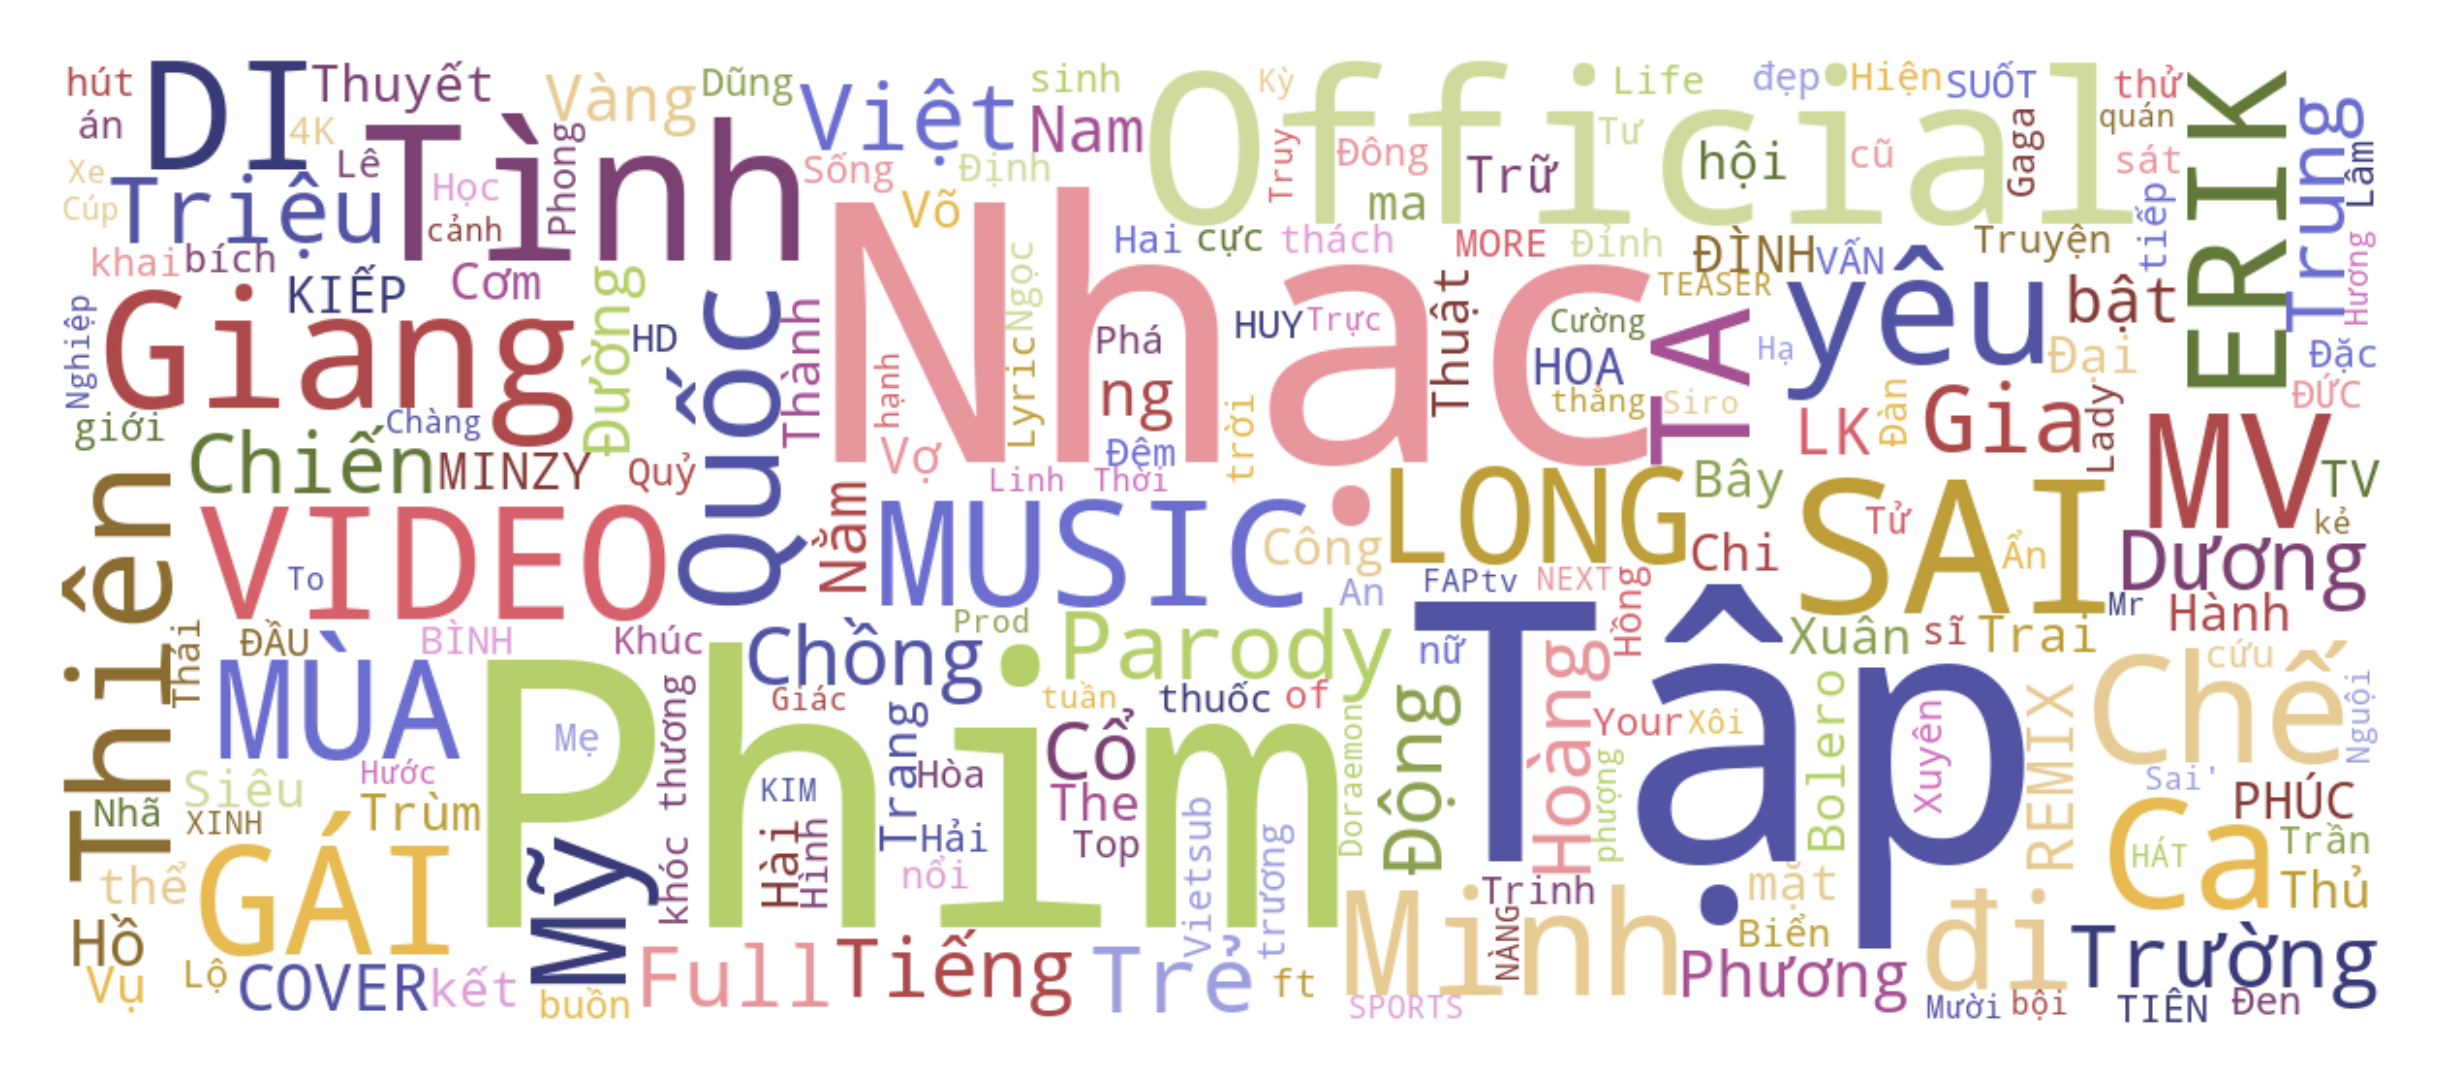

In [ ]:
wc = wordcloud.WordCloud(stopwords=stopwords,width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [ ]:
df.head()

video_id                                              title  \
0  WAxxfzdcNdA  em bỏ hút thuốc chưa - người yêu cũ nhắn tin h...   
1  8mItWIx3cs0  #3 Đàn ông dở nhất là phản bội, còn em không s...   
2  ayJY9ieBuEU  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3  GKTpUGkhvig           FAPtv Cơm Nguội: Tập 220 - Làng Nhảm Nhí   
4  qGjAWJ2zWWI                                   Agust D '대취타' MV   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-05-17T16:15:11Z  UC90LfbAFYhRLh86Qd-Fs4zg     BICH PHUONG          10   
1  2020-05-22T14:00:11Z  UC2Lgi2uPsOcCVF3imz7l2mg     Vie GIẢITRÍ          24   
2  2020-05-13T13:00:10Z  UCjm_FW7t1gam7qLldSVOclw       Hòa Minzy          10   
3  2020-05-23T12:58:15Z  UC0jDoh3tVXCaqJ6oTve8ebA          FAP TV           1   
4  2020-05-22T09:00:01Z  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10   

  trending_date                                               tags  \
0      20.26.05  em bỏ hút thuốc chưa|anh bỏ hút thuốc chưa|em ...   
1      20.26.05  vie giai tri|giai tri tv|người ấy là ai|người ...   
2      20.26.05  hoa minzy|hòa minzy|hòa minzy 2020|không thể c...   
3      20.26.05  FAPTV|faptv|faptivi|FAPtivi|Faptv cơm nguộii|c...   
4      20.26.05  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|Agust D|어거스트 디...   

   view_count    likes  dislikes  comment_count  \
0    12541198   329323     10193          33498   
1     5148975    47047      3533           6017   
2    21413308   637643     20295          52810   
3     3681043    92551      3305           2970   
4    44924142  5752355     99816         743758   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/WAxxfzdcNdA/default.jpg              False   
1  https://i.ytimg.com/vi/8mItWIx3cs0/default.jpg              False   
2  https://i.ytimg.com/vi/ayJY9ieBuEU/default.jpg              False   
3  https://i.ytimg.com/vi/GKTpUGkhvig/default.jpg              False   
4  https://i.ytimg.com/vi/qGjAWJ2zWWI/default.jpg              False   

   ratings_disabled                                        description  \
0             False  Bích Phương - em bỏ hút thuốc chưa? (feat. tra...   
1             False  #NgườiẤyLàAi #NguoiAyLaAiMua3 #VieChannelHTV2 ...   
2             False  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3             False  FAPtv Cơm Nguội: Tập 220 - Làng Nhảm NhíSăn X-...   
4             False  Agust D '대취타' MV Agust D - 'D-2' DownloadGoogl...   

           filename  contains_capitalized  title_length  
0  data_VN/VN01.csv                 False            85  
1  data_VN/VN01.csv                  True           100  
2  data_VN/VN01.csv                  True            79  
3  data_VN/VN01.csv                 False            40  
4  data_VN/VN01.csv                  True            16

In [ ]:
tags_words = list(df["tags"].apply(lambda x: x.split()))
tags_words = [x for y in tags_words for x in y]
Counter(tags_words).most_common(25)

[('sai', 981),
 ('ta', 633),
 ('trung', 618),
 ('hay', 563),
 ('không', 525),
 ('mới', 473),
 ('anh', 416),
 ('tập', 382),
 ('khong', 374),
 ('2020|phim', 358),
 ('tình', 357),
 ('giang', 342),
 ('chung', 332),
 ('chế', 319),
 ('quốc', 313),
 ('nhạc', 293),
 ('hay|phim', 278),
 ('chúng', 275),
 ('gia', 260),
 ('là', 243),
 ('thanh', 243),
 ('hành', 238),
 ('nhau', 235),
 ('hanh', 232),
 ('thiên', 231)]

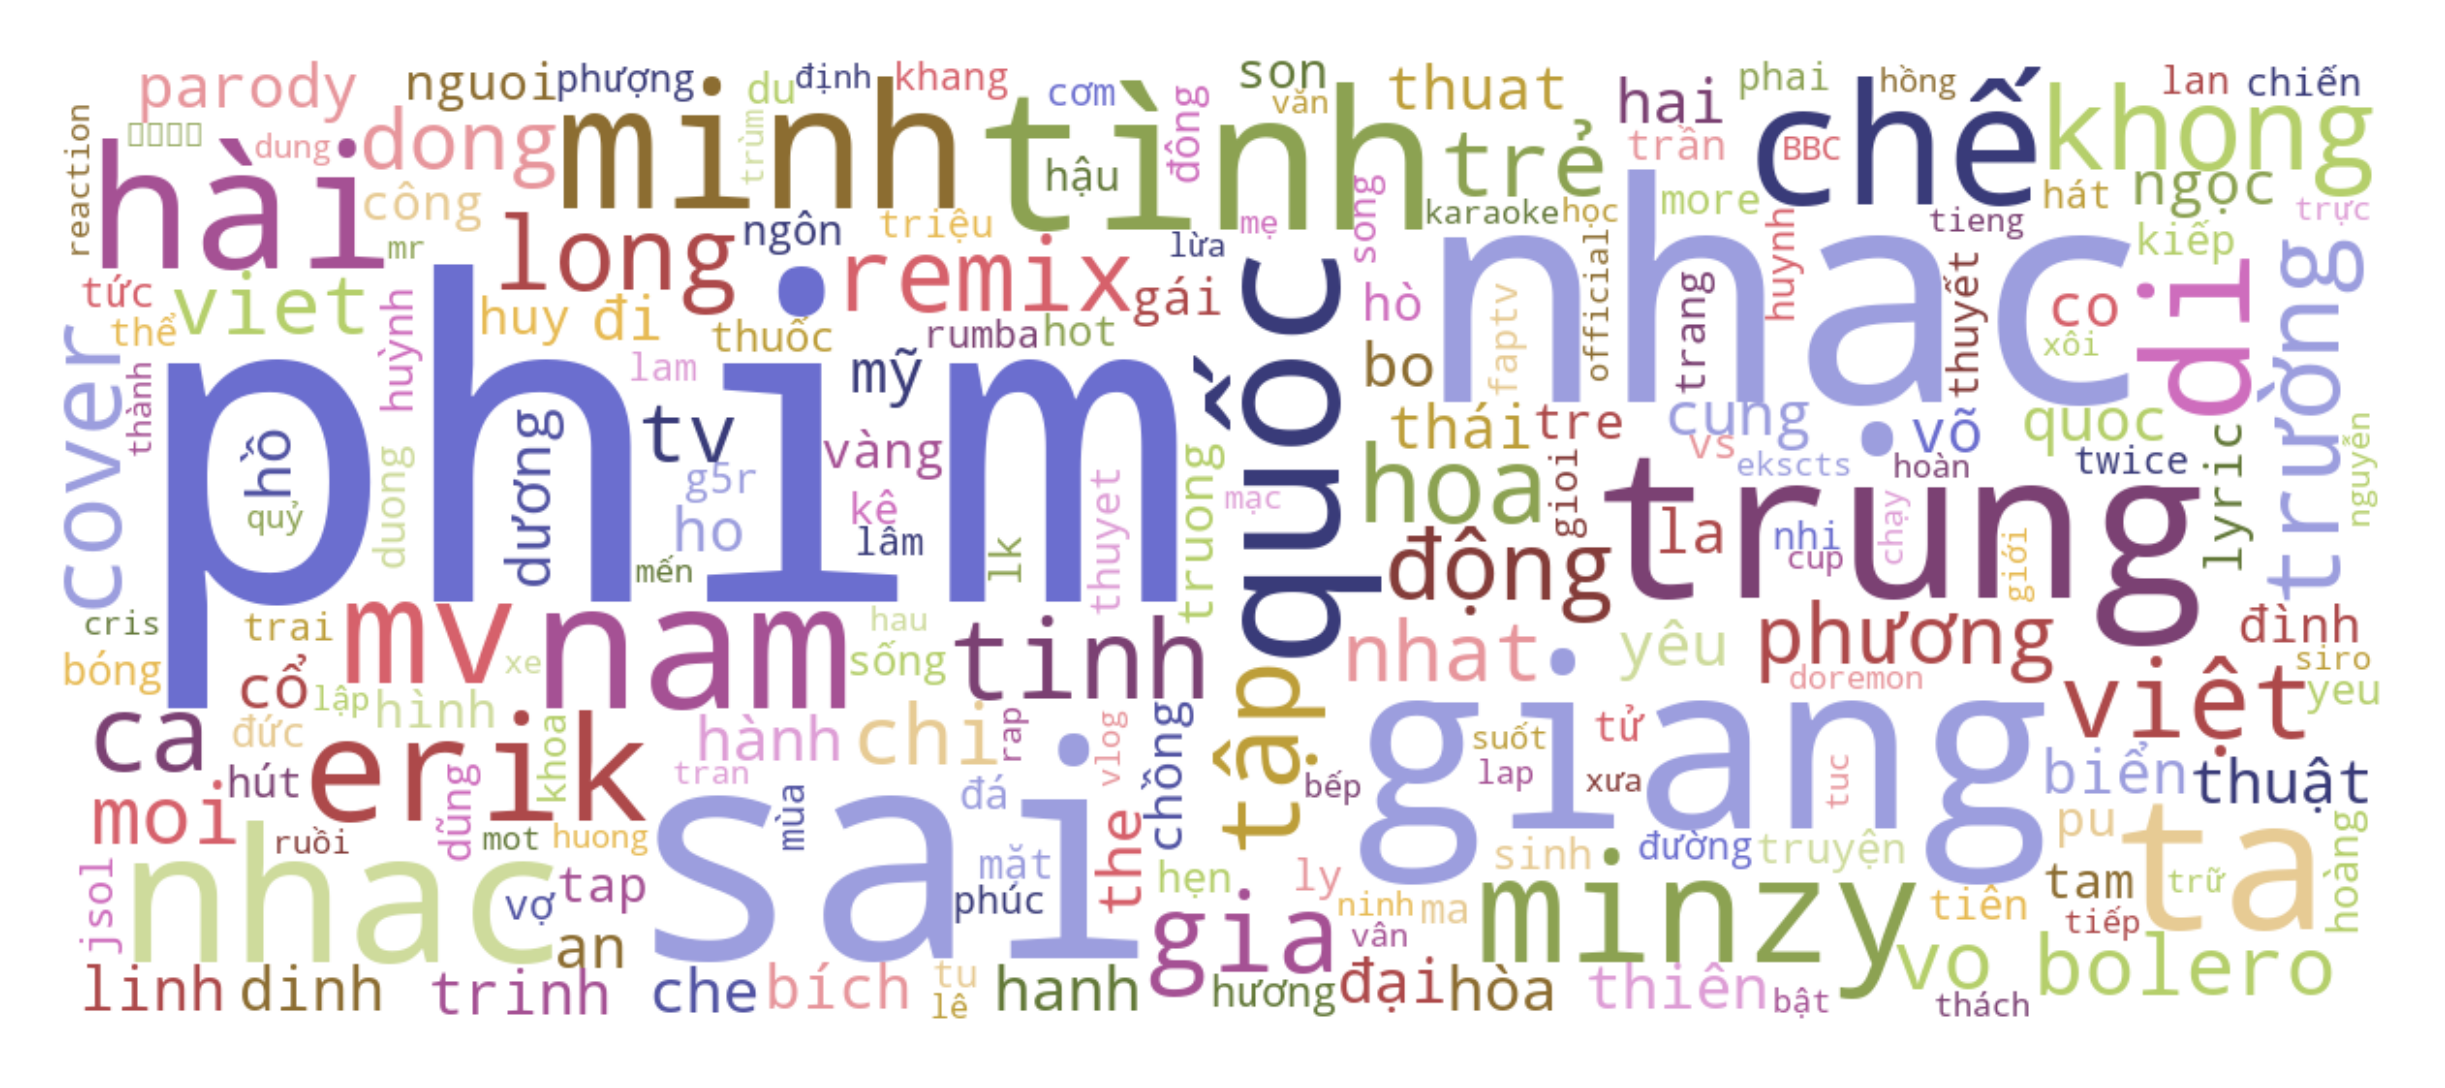

In [ ]:
wc = wordcloud.WordCloud(stopwords=stopwords,width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(tags_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Top các kênh có nhiều video trending nhất Việt Nam

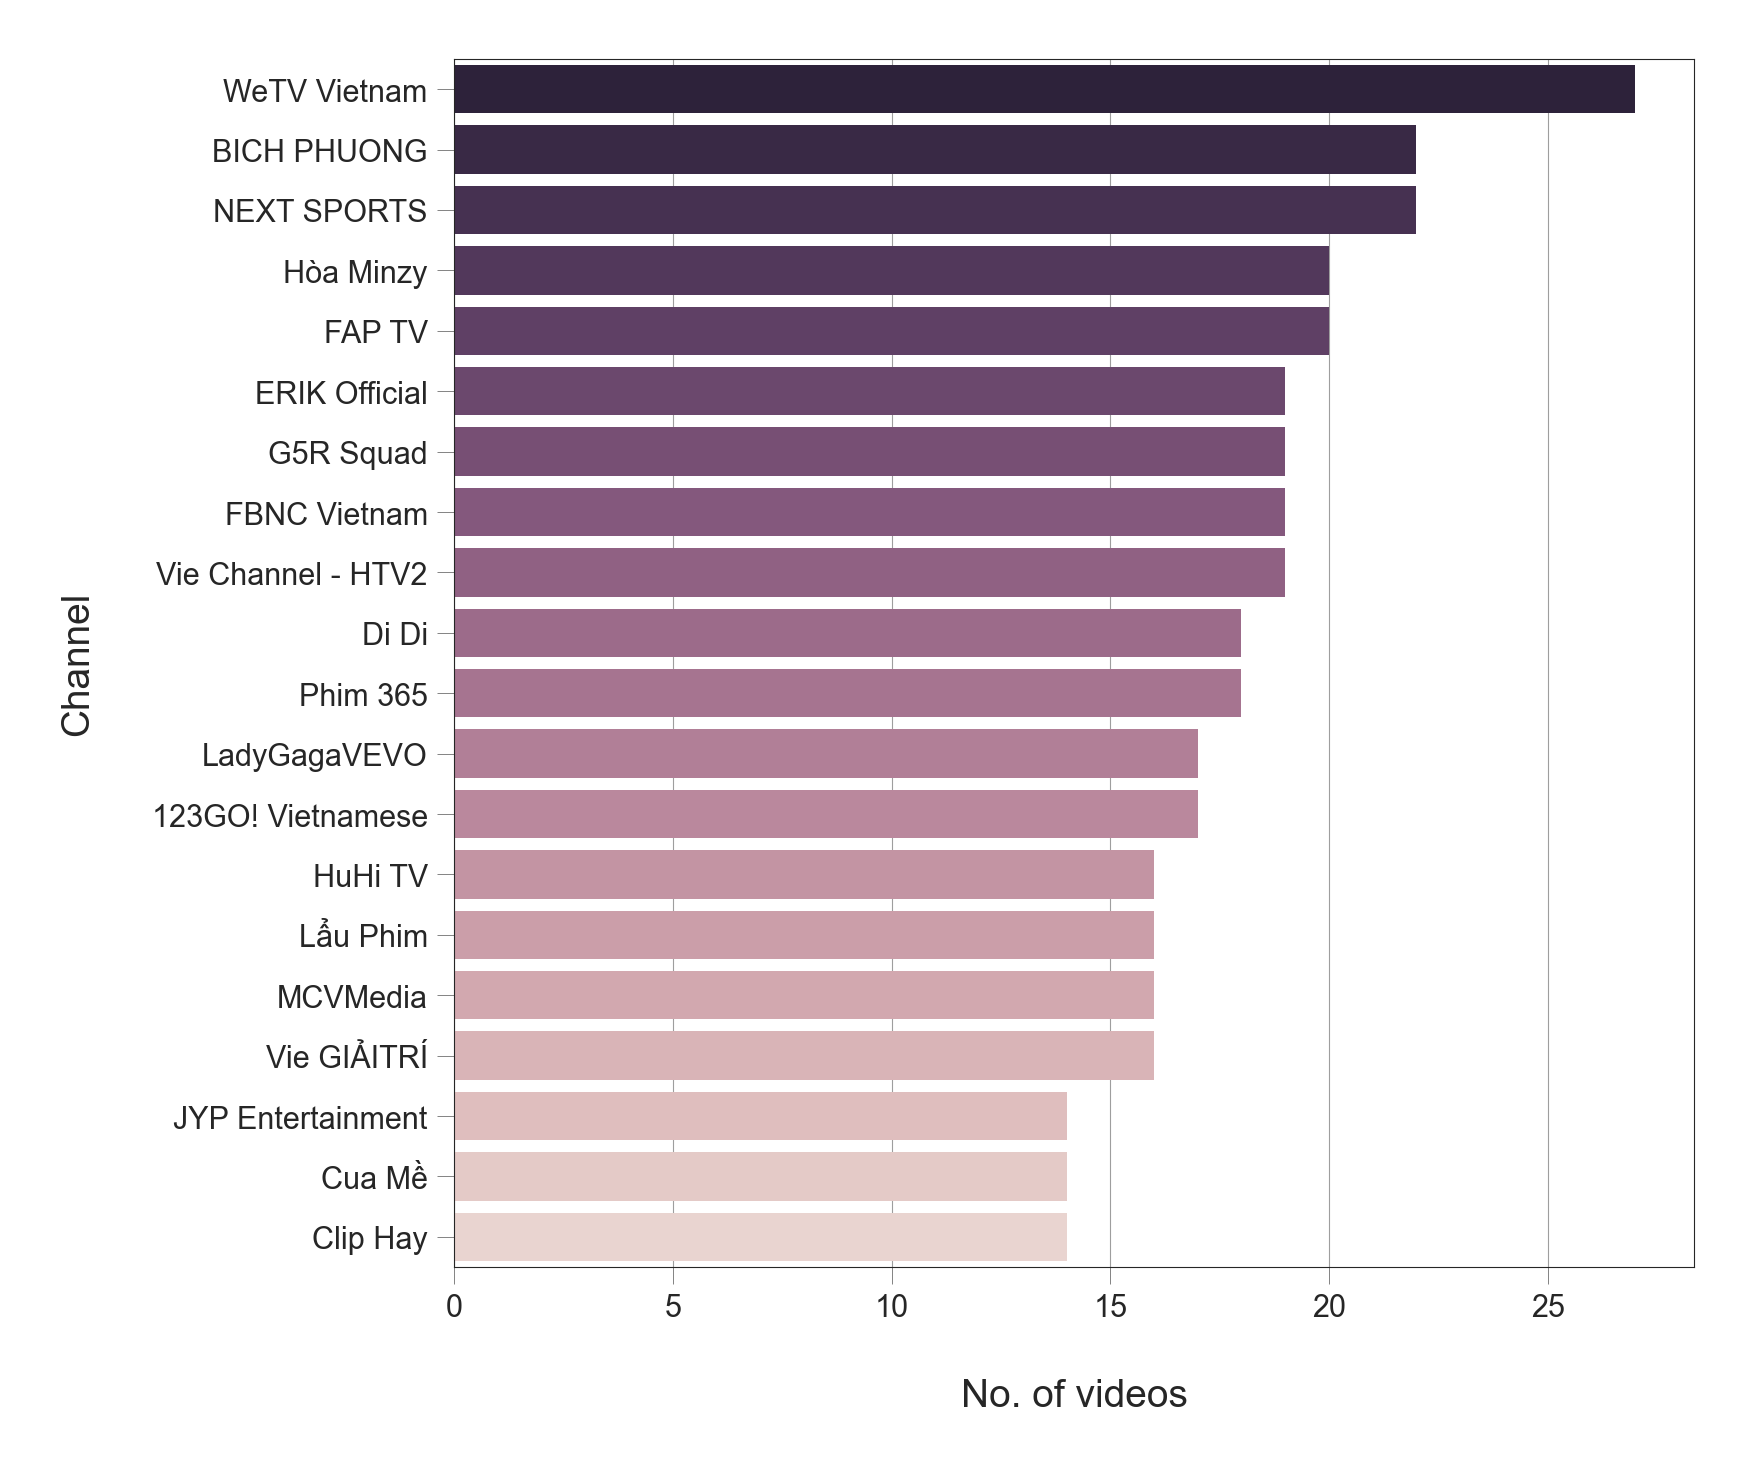

In [ ]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Thể loại video nào có nhiều video trending nhất Việt Nam?
First, we will add a column that contains category names based on the values in `category_id` column. We will use a category JSON file provided with the dataset which contains information about each category.

In [ ]:
with open("/Users/anhnhat/Documents/UEL/SepVI_1920/Phan tich du lieu Web/Final/VN_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

Now we can see which category had the largest number of trending videos

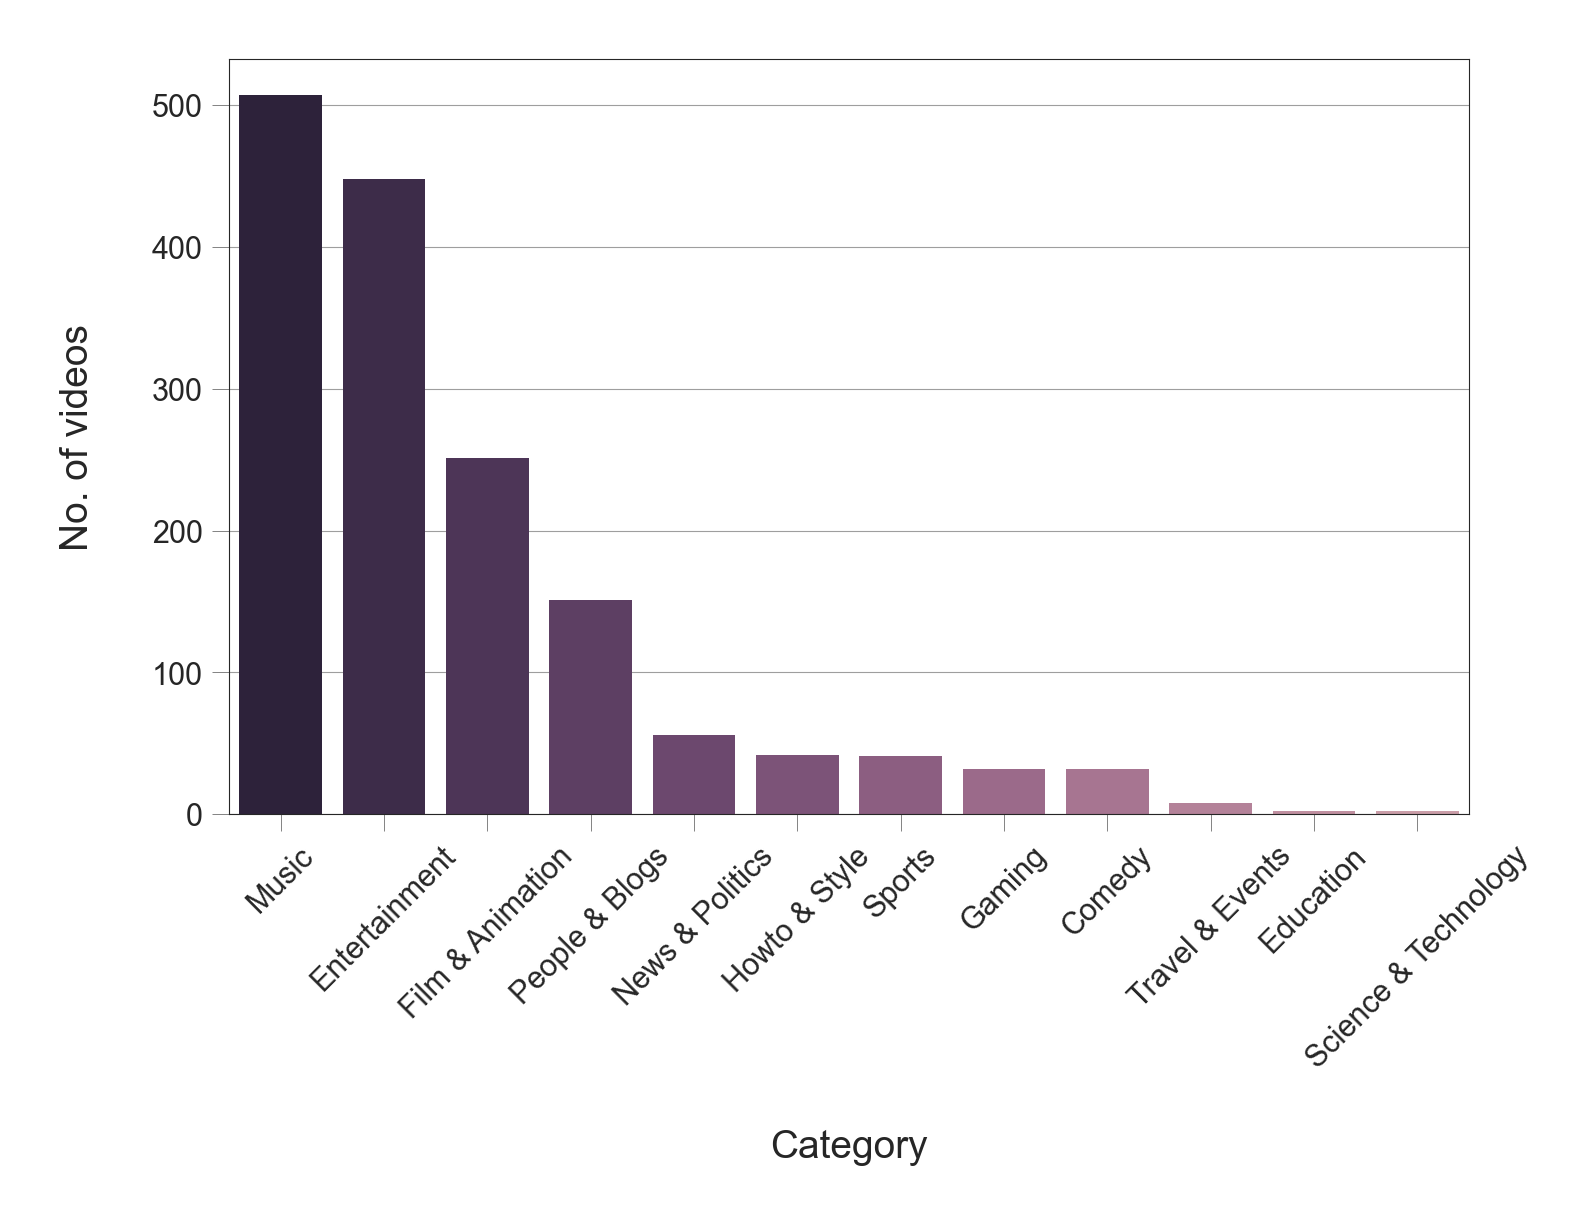

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around `10,000` videos, followed by Music category with around `6,200` videos, followed by Howto & Style category with around `4,100` videos, and so on.

## <a name="pub"></a>Thời gian đăng của các Videos Trending


In [ ]:
#df = pd.read_csv("/Users/anhnhat/Documents/UEL/SepVI_1920/Phan tich du lieu Web/Final/Coding/Trending-YouTube-Scraper/output/20.26.05_VN_videos.csv")

In [ ]:
df.head()

video_id                                              title  \
0  WAxxfzdcNdA  em bỏ hút thuốc chưa - người yêu cũ nhắn tin h...   
1  8mItWIx3cs0  #3 Đàn ông dở nhất là phản bội, còn em không s...   
2  ayJY9ieBuEU  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....   
3  GKTpUGkhvig           FAPtv Cơm Nguội: Tập 220 - Làng Nhảm Nhí   
4  qGjAWJ2zWWI                                   Agust D '대취타' MV   

                  channelId    channelTitle  categoryId trending_date  \
0  UC90LfbAFYhRLh86Qd-Fs4zg     BICH PHUONG          10      20.26.05   
1  UC2Lgi2uPsOcCVF3imz7l2mg     Vie GIẢITRÍ          24      20.26.05   
2  UCjm_FW7t1gam7qLldSVOclw       Hòa Minzy          10      20.26.05   
3  UC0jDoh3tVXCaqJ6oTve8ebA          FAP TV           1      20.26.05   
4  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels          10      20.26.05   

                                                tags  view_count    likes  \
0  em bỏ hút thuốc chưa|anh bỏ hút thuốc chưa|em ...    12541198   329323   
1  vie giai tri|giai tri tv|người ấy là ai|người ...     5148975    47047   
2  hoa minzy|hòa minzy|hòa minzy 2020|không thể c...    21413308   637643   
3  FAPTV|faptv|faptivi|FAPtivi|Faptv cơm nguộii|c...     3681043    92551   
4  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|Agust D|어거스트 디...    44924142  5752355   

   dislikes  ...                                  thumbnail_link  \
0     10193  ...  https://i.ytimg.com/vi/WAxxfzdcNdA/default.jpg   
1      3533  ...  https://i.ytimg.com/vi/8mItWIx3cs0/default.jpg   
2     20295  ...  https://i.ytimg.com/vi/ayJY9ieBuEU/default.jpg   
3      3305  ...  https://i.ytimg.com/vi/GKTpUGkhvig/default.jpg   
4     99816  ...  https://i.ytimg.com/vi/qGjAWJ2zWWI/default.jpg   

  comments_disabled  ratings_disabled  \
0             False             False   
1             False             False   
2             False             False   
3             False             False   
4             False             False   

                                         description          filename  \
0  Bích Phương - em bỏ hút thuốc chưa? (feat. tra...  data_VN/VN01.csv   
1  #NgườiẤyLàAi #NguoiAyLaAiMua3 #VieChannelHTV2 ...  data_VN/VN01.csv   
2  KHÔNG THỂ CÙNG NHAU SUỐT KIẾP - HOÀ MINZY (ft....  data_VN/VN01.csv   
3  FAPtv Cơm Nguội: Tập 220 - Làng Nhảm NhíSăn X-...  data_VN/VN01.csv   
4  Agust D '대취타' MV Agust D - 'D-2' DownloadGoogl...  data_VN/VN01.csv   

  contains_capitalized  title_length     category_name publishing_day  \
0                False            85             Music            Sun   
1                 True           100     Entertainment            Fri   
2                 True            79             Music            Wed   
3                False            40  Film & Animation            Sat   
4                 True            16             Music            Fri   

  publishing_hour  
0              16  
1              14  
2              13  
3              12  
4              09  

[5 rows x 21 columns]

Now we can see which days of the week had the largest numbers of trending videos

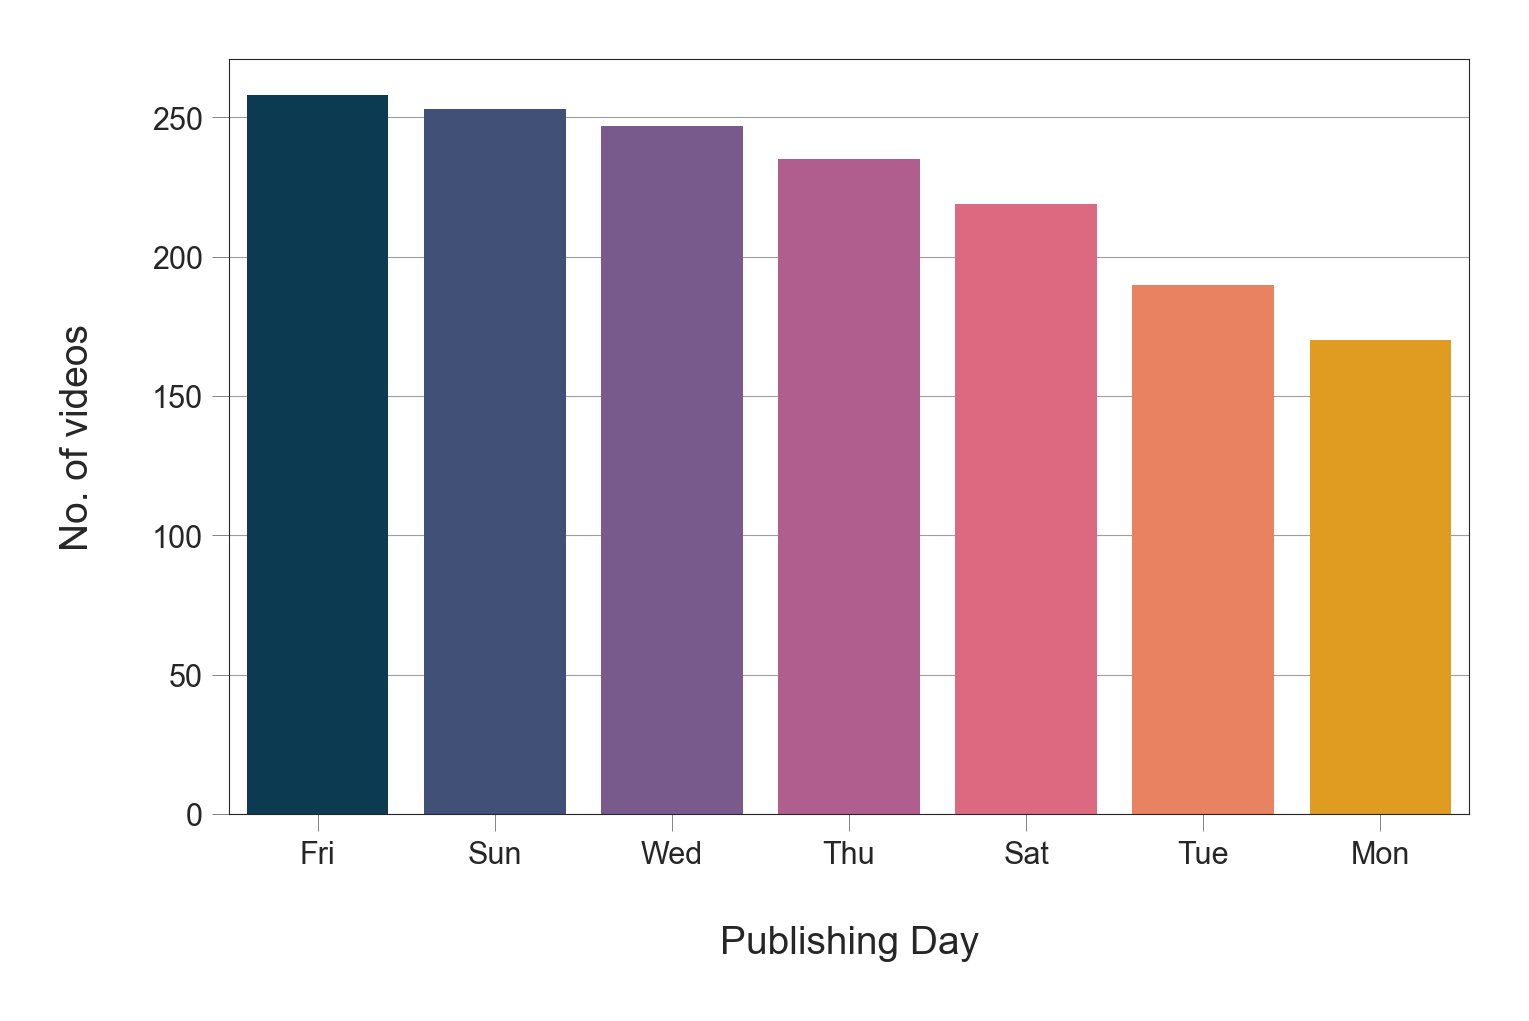

In [ ]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

Chúng ta có thể thấy rằng số lượng Video Trending được đăng vào Thứ hai và Thứ ba  ít hơn đáng kể so với số lượng Video Trending được công bố vào các ngày khác trong tuần.

Bây giờ, hãy sử dụng cột `Publishing_hour` để xem giờ xuất bản nào có số lượng video xu hướng lớn nhất

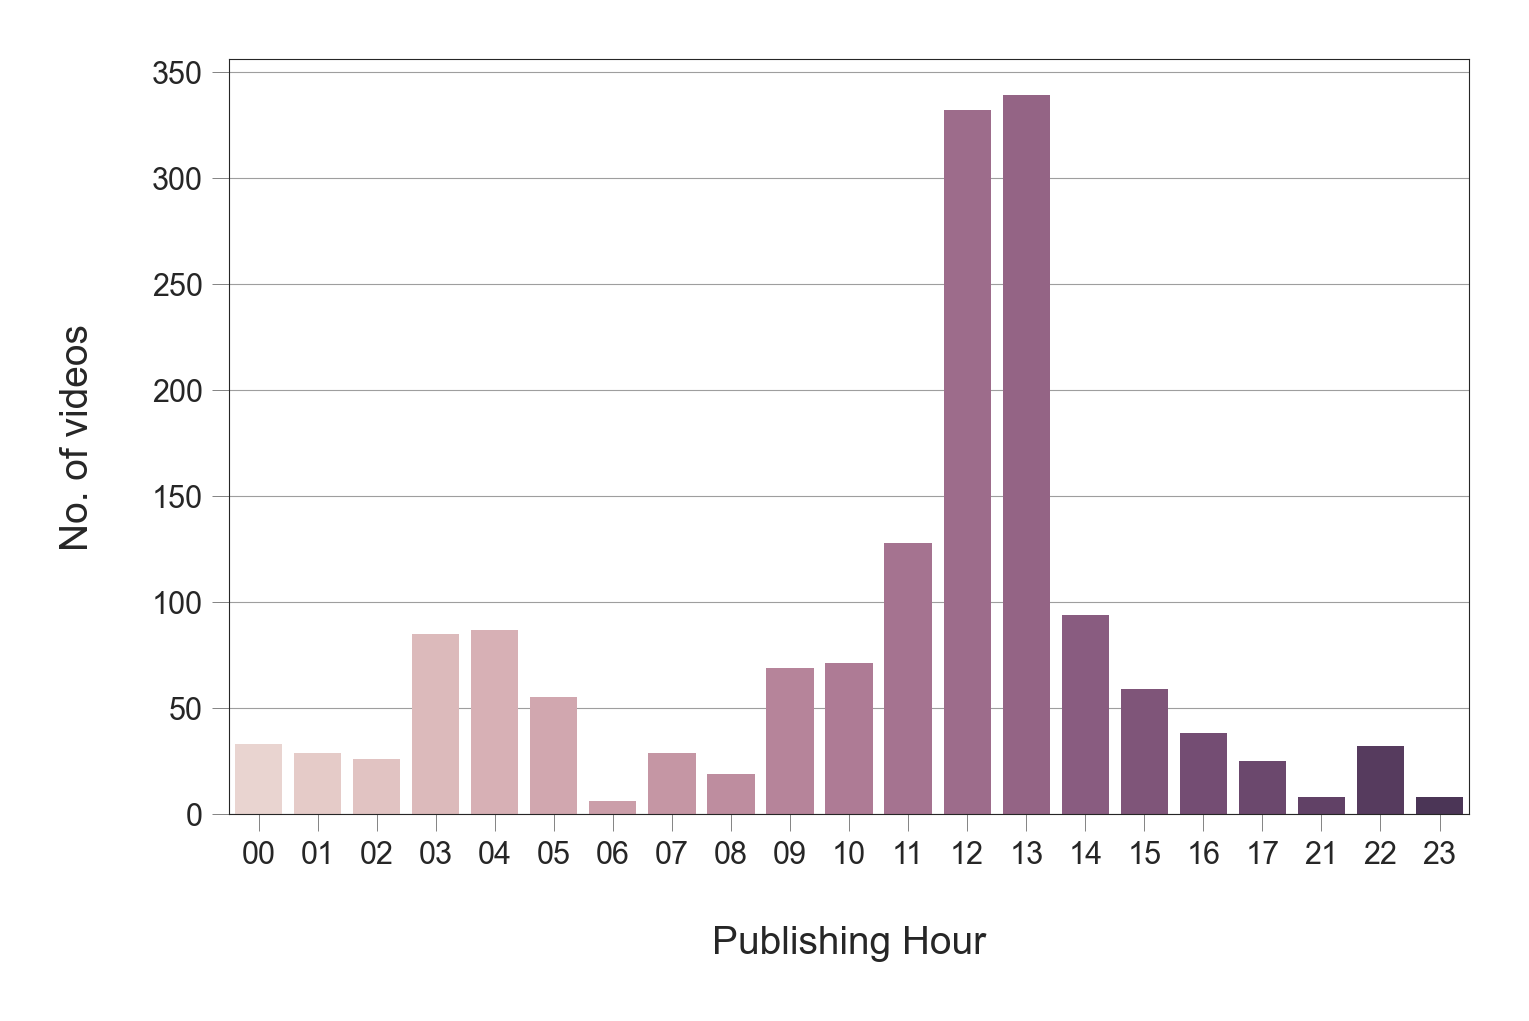

In [ ]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

Ta có thể thấy được rằng khoảng thời gian đăng video từ 12PM-13PM là cao điểm nhất, đây là khoảng thời gian nếu bạn đăng sẽ có nhiều khả năng xuất hiện ở trending nhất. Điều này khá lạ khi so sánh với các quốc gia khác, đơn cử là nếu ở Mỹ thì videos thường được đăng vào các khung giờ buổi tối.


## <a name="commdis"></a>Có bao nhiêu Videos được đóng tính năng bình luận?


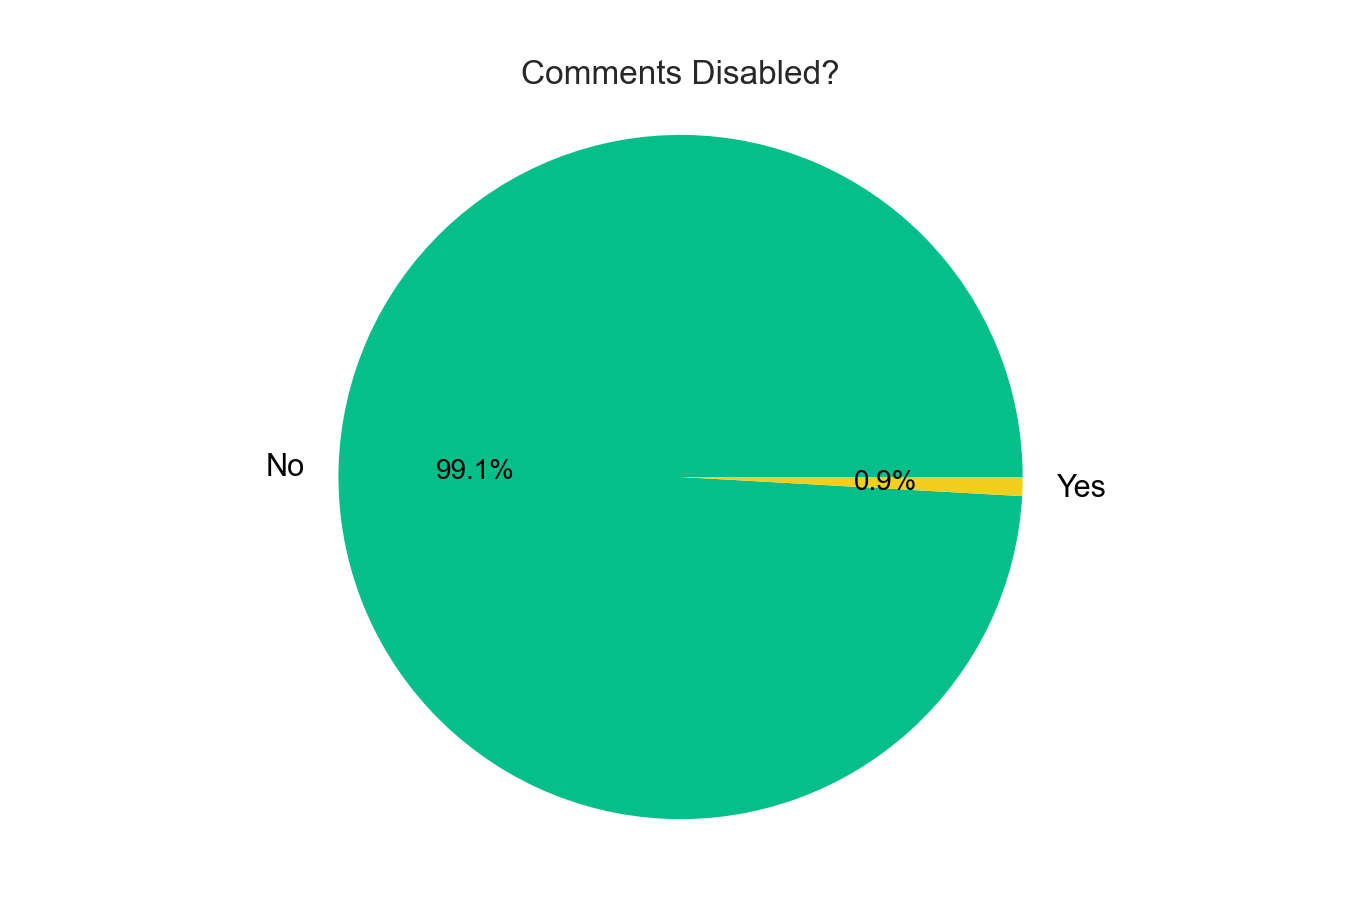

In [ ]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]],autopct='%0.1f%%', labels=['No', 'Yes'], 
           colors=['#04BF8A', '#F2CF1D'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

Chỉ có khoảng 1% videos là khóa bình luận

## <a name="ratdis"></a>Bao nhiêu videos được khóa đánh giá (like/dislike)?


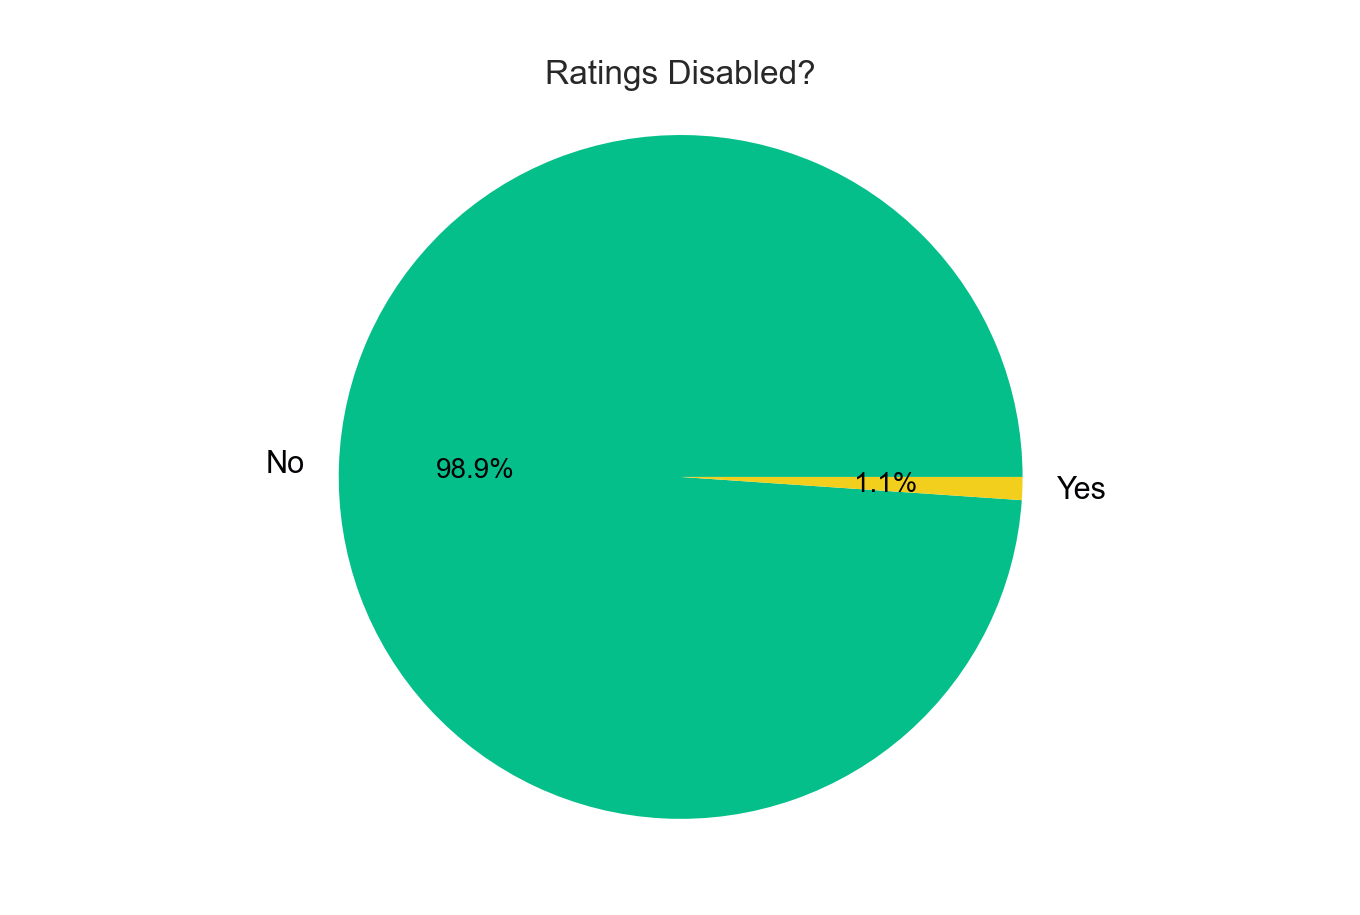

In [ ]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]],autopct='%0.1f%%', labels=['No', 'Yes'], 
           colors=['#04BF8A', '#F2CF1D'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
df["ratings_disabled"].value_counts()

False    1555
True       17
Name: ratings_disabled, dtype: int64

So there are just `106` trending videos that have both comments and ratings disabled

## <a name="conc"></a>Kết luận
Dưới đây là một số kết luận mà nhóm đã thu tập được
* Nhóm đã thu thập và phân tích Youtube Trending Việt Nam trong `9 days`. Tập dữ liệu được thu thập vào cuối tháng 5 và đầu tháng 6 năm 2020. Nó bao gồm  **`1572`** videos đầu vào.
* `92.2%` videos trending có dưới `10` triệu views, and **`81,3%`** videos có dưới **`5`** triệu views.
* `78,2%` của videos trending có dưới `60,000` likes, và **`82,7%`** videos có dưới **`100,000`** likes.
* `92,6%`  videos trending  có ít hơn `20,000` comments.
* Rất nhiều videos liên tục đứng top bảng xếp hạng trending trong nhiều ngày liền. Dữ liệu của chúng ta có `1572` videos đầu vào nhưng chỉ có `430` videos là duy nhất.
* Những videos có hơn **`5,000,000`** views và lớn hơn thường có độ dài tiêu đề video nằm trong khoảng `15` and `20` từ, hoặc là `60` từ.
* Các stopword `-` và `|` rất phổ biến trong title của các videos.
* Các cụm từ như 'Official', 'Video', 'Phim', 'Nhạc', 'Tập' rất phổ biến trong tiêu đề các video.
* Có một mối tương quan tích cực rất mạnh giữa số lượt xem và số lượt thích của các Videos trending: Khi một trong số chúng tăng, số khác tăng và ngược lại.
* Có một mối tương quan tích cực mạnh mẽ giữa số lượt thích và số lượng bình luận, giữa số lượng không thích và số lượng bình luận cũng có mối tương quan tương tự.
* Danh mục có số lượng video xu hướng lớn nhất là ** 'Âm nhạc' ** với hơn `500` videos, tiếp theo là danh mục `Giải trí`, `Phim và hoạt hình`.
* On the opposite side, the category that has the smallest number of trending videos is 'Shows' with `57` videos, followed by 'Nonprofits & Activisim' with `57` videos, followed by 'Autos & Vehicles' with `384` videos.
* Điều đáng buồn là các videos nằm trong danh mục `Khoa học và công nghệ`, `Giáo dục` là các chủ đề có ít videos trending nhất. 